# Loan Approval Prediction

##### We need to predict by given dataset whether a person will be able to get a loan as per his/her information. This can be used as website for customers to check their eligibility for a loan.

#### Importing the basic libraries and modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\Vyas\1_Assignment\Projects\Other Projects\Loan_Prediction_Analysis\Loan Prediction Dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
print("No of Rows: ", df.shape[0])
print("No of Columns: ", df.shape[1])

No of Rows:  614
No of Columns:  13


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Preprocessing the data

Checking the null values

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Filling null values in Numerical Columns with mean values of the respective columns

In [7]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

Filling null values in Categorical Columns with mode values of the respective columns

In [8]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Exploratory Data Analysis

Category Column Visualisation

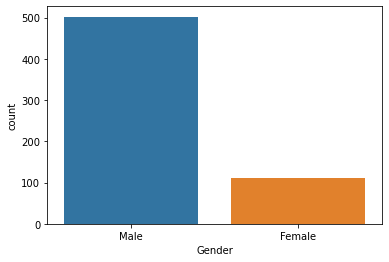

In [10]:
sns.countplot(df['Gender']);

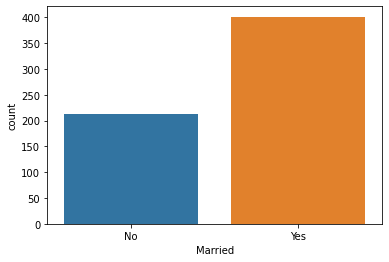

In [11]:
sns.countplot(df['Married']);

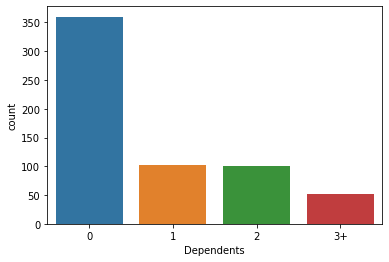

In [12]:
sns.countplot(df['Dependents']);

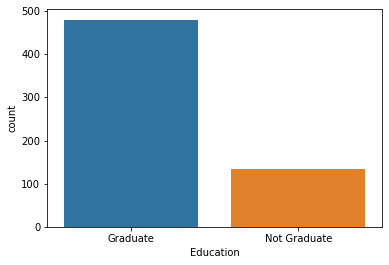

In [13]:
sns.countplot(df['Education']);

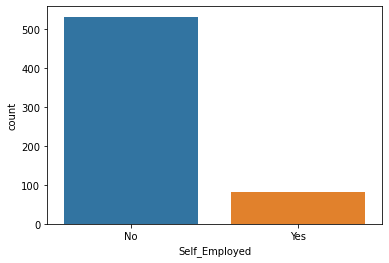

In [14]:
sns.countplot(df['Self_Employed']);

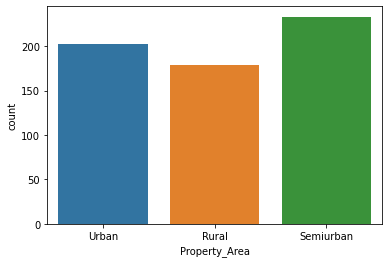

In [15]:
sns.countplot(df['Property_Area']);

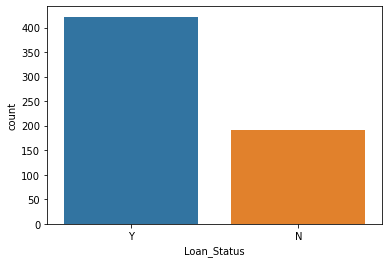

In [16]:
sns.countplot(df['Loan_Status']);

Numerical Column Visualization

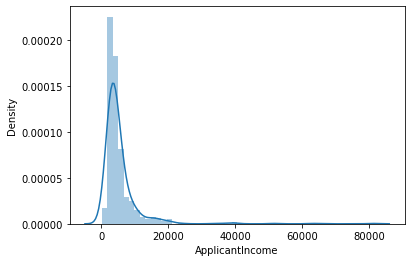

In [17]:
sns.distplot(df['ApplicantIncome']);

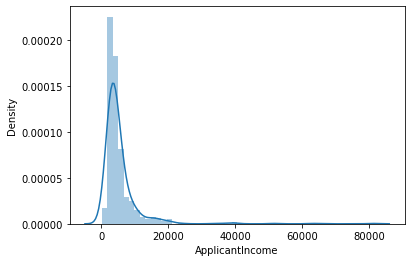

In [18]:
sns.distplot(df['ApplicantIncome']);

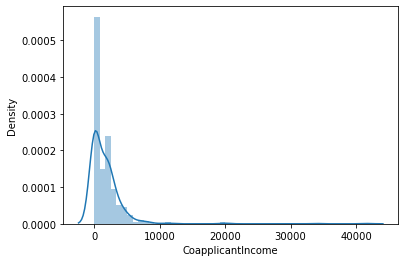

In [19]:
sns.distplot(df['CoapplicantIncome']);

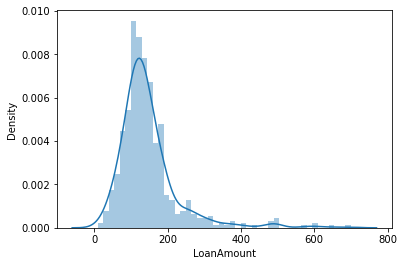

In [20]:
sns.distplot(df['LoanAmount']);

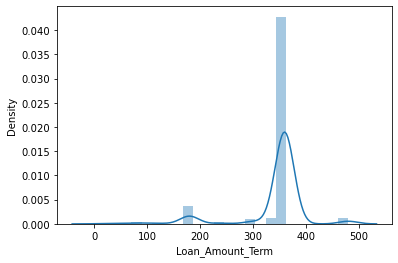

In [21]:
sns.distplot(df['Loan_Amount_Term']);

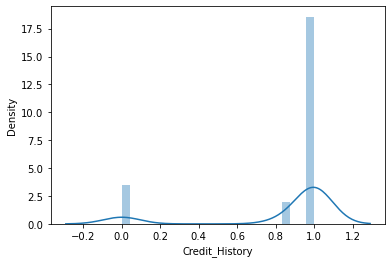

In [22]:
sns.distplot(df['Credit_History']);

###### As income of applicant and coapplicant are from same source/family, we create new feature called Total Income

In [23]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


###### As we can see there is lot of values ranging differently in numerical features, we need to apply log transformation to make sure we have more acceptable range for model to perform accurately

#### Log Transformation

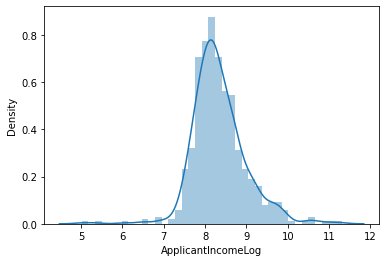

In [24]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncomeLog']);

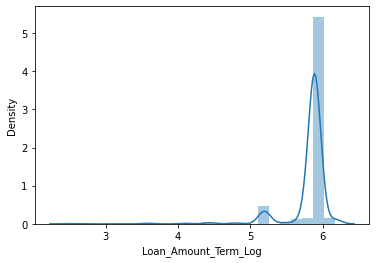

In [25]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_Term_Log']);

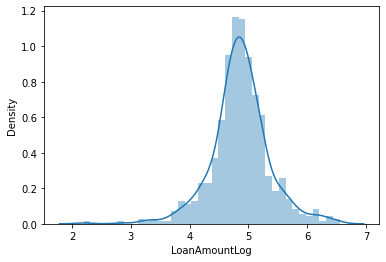

In [26]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.distplot(df['LoanAmountLog']);

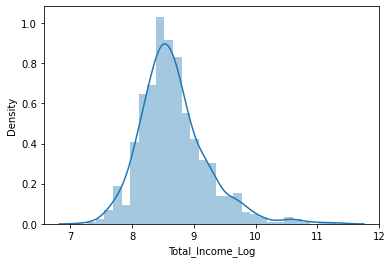

In [27]:
df['Total_Income_Log'] = np.log(df['Total_Income'])
sns.distplot(df['Total_Income_Log']);

###### Corelation Matrix

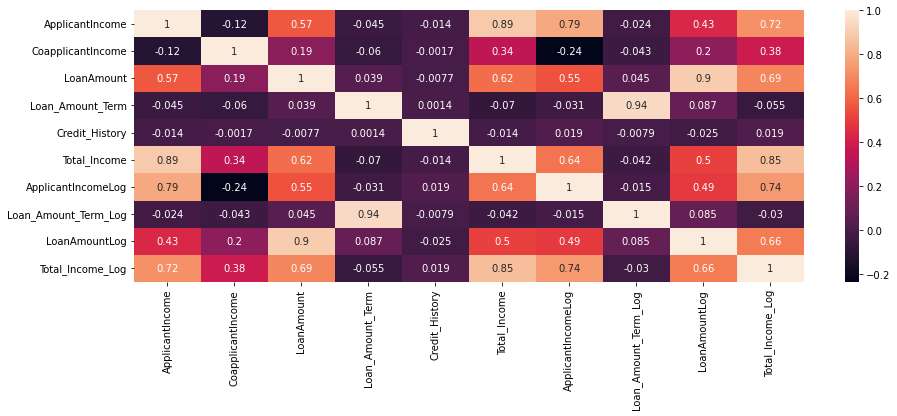

In [28]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot=True);

In [29]:
del_col = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID']
df.drop(columns=del_col, axis=1, inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,Loan_Amount_Term_Log,LoanAmountLog,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,5.886104,4.986426,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,5.886104,4.852030,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,5.886104,4.189655,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,5.886104,4.787492,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,5.886104,4.948760,8.699515


###### Label Encoding on the Categorical Column

In [30]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [31]:
col = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
for i in col:
    df[i] = enc.fit_transform(df[i])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,Loan_Amount_Term_Log,LoanAmountLog,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674026,5.886104,4.986426,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,5.886104,4.852030,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,5.886104,4.189655,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,5.886104,4.787492,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,5.886104,4.948760,8.699515


### Building Model

###### Splitting data for training and testing

In [32]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [33]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3, random_state = 6)

#### Model Training

In [34]:
from sklearn.model_selection import cross_val_score
def get_score(model,X,y):
    X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3, random_state = 6)
    model.fit(X_train,y_train)
    print(f'Accuracy is: {model.score(X_test,y_test)*100}')
    score = cross_val_score(model,X,y,cv=6)
    print(f'Cross Validation score is: {np.mean(score)*100}')

###### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
get_score(model,X,y)

Accuracy is: 81.62162162162161
Cross Validation score is: 80.94898153436131


###### Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
get_score(model,X,y)

Accuracy is: 69.72972972972973
Cross Validation score is: 71.162510311568


###### Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
get_score(model,X,y)

Accuracy is: 82.70270270270271
Cross Validation score is: 79.32292658163588


###### Extra Tree Classifier

In [38]:
model = ExtraTreesClassifier()
get_score(model,X,y)

Accuracy is: 79.45945945945945
Cross Validation score is: 77.20032997017577


###### XGBoost Classifier

In [39]:
from xgboost import XGBClassifier

In [40]:
model = XGBClassifier()
get_score(model,X,y)

[16:38:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy is: 80.54054054054053
[16:38:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:38:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:38:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if y

###### LGBM Classifier

In [41]:
from lightgbm import LGBMClassifier

In [42]:
model = LGBMClassifier()
get_score(model,X,y)

Accuracy is: 82.16216216216216
Cross Validation score is: 77.69528523383462


###### Catboost Classifier

In [43]:
from catboost import CatBoostClassifier

In [44]:
model = CatBoostClassifier()
get_score(model,X,y)

Learning rate set to 0.007178
0:	learn: 0.6897529	total: 141ms	remaining: 2m 21s
1:	learn: 0.6856572	total: 145ms	remaining: 1m 12s
2:	learn: 0.6819261	total: 149ms	remaining: 49.5s
3:	learn: 0.6784022	total: 153ms	remaining: 38s
4:	learn: 0.6746733	total: 156ms	remaining: 31.1s
5:	learn: 0.6710311	total: 160ms	remaining: 26.5s
6:	learn: 0.6676241	total: 164ms	remaining: 23.2s
7:	learn: 0.6645961	total: 167ms	remaining: 20.7s
8:	learn: 0.6613746	total: 171ms	remaining: 18.8s
9:	learn: 0.6578803	total: 174ms	remaining: 17.3s
10:	learn: 0.6548615	total: 179ms	remaining: 16.1s
11:	learn: 0.6516588	total: 183ms	remaining: 15s
12:	learn: 0.6483715	total: 187ms	remaining: 14.2s
13:	learn: 0.6454285	total: 190ms	remaining: 13.4s
14:	learn: 0.6422722	total: 195ms	remaining: 12.8s
15:	learn: 0.6389645	total: 199ms	remaining: 12.2s
16:	learn: 0.6362689	total: 202ms	remaining: 11.7s
17:	learn: 0.6336257	total: 205ms	remaining: 11.2s
18:	learn: 0.6309211	total: 209ms	remaining: 10.8s
19:	learn: 0.

171:	learn: 0.4397333	total: 703ms	remaining: 3.38s
172:	learn: 0.4391476	total: 707ms	remaining: 3.38s
173:	learn: 0.4386944	total: 710ms	remaining: 3.37s
174:	learn: 0.4379004	total: 713ms	remaining: 3.36s
175:	learn: 0.4371722	total: 717ms	remaining: 3.35s
176:	learn: 0.4366263	total: 720ms	remaining: 3.35s
177:	learn: 0.4364124	total: 721ms	remaining: 3.33s
178:	learn: 0.4359041	total: 725ms	remaining: 3.32s
179:	learn: 0.4354607	total: 728ms	remaining: 3.32s
180:	learn: 0.4345073	total: 732ms	remaining: 3.31s
181:	learn: 0.4338670	total: 735ms	remaining: 3.3s
182:	learn: 0.4333788	total: 739ms	remaining: 3.3s
183:	learn: 0.4328360	total: 742ms	remaining: 3.29s
184:	learn: 0.4320978	total: 746ms	remaining: 3.28s
185:	learn: 0.4311864	total: 749ms	remaining: 3.28s
186:	learn: 0.4306894	total: 752ms	remaining: 3.27s
187:	learn: 0.4300308	total: 756ms	remaining: 3.26s
188:	learn: 0.4294093	total: 759ms	remaining: 3.26s
189:	learn: 0.4289375	total: 763ms	remaining: 3.25s
190:	learn: 0.

359:	learn: 0.3652590	total: 1.36s	remaining: 2.42s
360:	learn: 0.3647645	total: 1.36s	remaining: 2.41s
361:	learn: 0.3644523	total: 1.37s	remaining: 2.41s
362:	learn: 0.3641356	total: 1.37s	remaining: 2.4s
363:	learn: 0.3637570	total: 1.37s	remaining: 2.4s
364:	learn: 0.3632966	total: 1.38s	remaining: 2.39s
365:	learn: 0.3628718	total: 1.38s	remaining: 2.39s
366:	learn: 0.3626524	total: 1.38s	remaining: 2.39s
367:	learn: 0.3622080	total: 1.39s	remaining: 2.38s
368:	learn: 0.3619319	total: 1.39s	remaining: 2.38s
369:	learn: 0.3616528	total: 1.39s	remaining: 2.37s
370:	learn: 0.3612672	total: 1.4s	remaining: 2.37s
371:	learn: 0.3610173	total: 1.4s	remaining: 2.36s
372:	learn: 0.3606969	total: 1.4s	remaining: 2.36s
373:	learn: 0.3604898	total: 1.41s	remaining: 2.35s
374:	learn: 0.3602833	total: 1.41s	remaining: 2.35s
375:	learn: 0.3596397	total: 1.41s	remaining: 2.35s
376:	learn: 0.3591876	total: 1.42s	remaining: 2.34s
377:	learn: 0.3589925	total: 1.42s	remaining: 2.34s
378:	learn: 0.358

518:	learn: 0.3232512	total: 1.89s	remaining: 1.75s
519:	learn: 0.3231168	total: 1.89s	remaining: 1.75s
520:	learn: 0.3229148	total: 1.89s	remaining: 1.74s
521:	learn: 0.3226543	total: 1.9s	remaining: 1.74s
522:	learn: 0.3223073	total: 1.9s	remaining: 1.73s
523:	learn: 0.3221610	total: 1.91s	remaining: 1.73s
524:	learn: 0.3218814	total: 1.91s	remaining: 1.73s
525:	learn: 0.3216948	total: 1.91s	remaining: 1.72s
526:	learn: 0.3215253	total: 1.92s	remaining: 1.72s
527:	learn: 0.3211722	total: 1.92s	remaining: 1.72s
528:	learn: 0.3210191	total: 1.92s	remaining: 1.71s
529:	learn: 0.3208309	total: 1.93s	remaining: 1.71s
530:	learn: 0.3206022	total: 1.93s	remaining: 1.7s
531:	learn: 0.3202266	total: 1.93s	remaining: 1.7s
532:	learn: 0.3199527	total: 1.94s	remaining: 1.7s
533:	learn: 0.3197889	total: 1.94s	remaining: 1.69s
534:	learn: 0.3196334	total: 1.94s	remaining: 1.69s
535:	learn: 0.3192752	total: 1.95s	remaining: 1.68s
536:	learn: 0.3190281	total: 1.95s	remaining: 1.68s
537:	learn: 0.318

686:	learn: 0.2864752	total: 2.45s	remaining: 1.12s
687:	learn: 0.2862781	total: 2.46s	remaining: 1.11s
688:	learn: 0.2860939	total: 2.46s	remaining: 1.11s
689:	learn: 0.2859348	total: 2.46s	remaining: 1.11s
690:	learn: 0.2856146	total: 2.47s	remaining: 1.1s
691:	learn: 0.2853273	total: 2.47s	remaining: 1.1s
692:	learn: 0.2850616	total: 2.47s	remaining: 1.1s
693:	learn: 0.2848426	total: 2.48s	remaining: 1.09s
694:	learn: 0.2846894	total: 2.48s	remaining: 1.09s
695:	learn: 0.2844989	total: 2.48s	remaining: 1.08s
696:	learn: 0.2844738	total: 2.49s	remaining: 1.08s
697:	learn: 0.2842579	total: 2.49s	remaining: 1.08s
698:	learn: 0.2840300	total: 2.49s	remaining: 1.07s
699:	learn: 0.2838561	total: 2.5s	remaining: 1.07s
700:	learn: 0.2837386	total: 2.5s	remaining: 1.07s
701:	learn: 0.2833910	total: 2.5s	remaining: 1.06s
702:	learn: 0.2832203	total: 2.51s	remaining: 1.06s
703:	learn: 0.2830059	total: 2.51s	remaining: 1.05s
704:	learn: 0.2828859	total: 2.51s	remaining: 1.05s
705:	learn: 0.2827

859:	learn: 0.2531442	total: 3.1s	remaining: 505ms
860:	learn: 0.2528831	total: 3.11s	remaining: 502ms
861:	learn: 0.2528284	total: 3.11s	remaining: 498ms
862:	learn: 0.2524964	total: 3.12s	remaining: 495ms
863:	learn: 0.2522769	total: 3.12s	remaining: 491ms
864:	learn: 0.2521213	total: 3.12s	remaining: 487ms
865:	learn: 0.2519593	total: 3.13s	remaining: 484ms
866:	learn: 0.2518334	total: 3.13s	remaining: 480ms
867:	learn: 0.2516217	total: 3.13s	remaining: 477ms
868:	learn: 0.2513026	total: 3.14s	remaining: 473ms
869:	learn: 0.2510788	total: 3.14s	remaining: 469ms
870:	learn: 0.2509084	total: 3.14s	remaining: 466ms
871:	learn: 0.2507862	total: 3.15s	remaining: 462ms
872:	learn: 0.2505701	total: 3.15s	remaining: 458ms
873:	learn: 0.2504187	total: 3.15s	remaining: 455ms
874:	learn: 0.2502473	total: 3.16s	remaining: 451ms
875:	learn: 0.2501323	total: 3.16s	remaining: 447ms
876:	learn: 0.2500276	total: 3.16s	remaining: 444ms
877:	learn: 0.2498326	total: 3.17s	remaining: 440ms
878:	learn: 0

53:	learn: 0.5488841	total: 177ms	remaining: 3.1s
54:	learn: 0.5470646	total: 181ms	remaining: 3.11s
55:	learn: 0.5451664	total: 184ms	remaining: 3.1s
56:	learn: 0.5437165	total: 188ms	remaining: 3.11s
57:	learn: 0.5414418	total: 191ms	remaining: 3.11s
58:	learn: 0.5396171	total: 195ms	remaining: 3.1s
59:	learn: 0.5381283	total: 198ms	remaining: 3.1s
60:	learn: 0.5364140	total: 201ms	remaining: 3.1s
61:	learn: 0.5348235	total: 205ms	remaining: 3.1s
62:	learn: 0.5333587	total: 208ms	remaining: 3.1s
63:	learn: 0.5322028	total: 210ms	remaining: 3.07s
64:	learn: 0.5305128	total: 213ms	remaining: 3.07s
65:	learn: 0.5292681	total: 216ms	remaining: 3.06s
66:	learn: 0.5273980	total: 219ms	remaining: 3.05s
67:	learn: 0.5261868	total: 222ms	remaining: 3.04s
68:	learn: 0.5250712	total: 224ms	remaining: 3.03s
69:	learn: 0.5240074	total: 227ms	remaining: 3.01s
70:	learn: 0.5227736	total: 229ms	remaining: 3s
71:	learn: 0.5219982	total: 231ms	remaining: 2.98s
72:	learn: 0.5204467	total: 234ms	remaini

215:	learn: 0.4156231	total: 706ms	remaining: 2.56s
216:	learn: 0.4148867	total: 709ms	remaining: 2.56s
217:	learn: 0.4146915	total: 713ms	remaining: 2.56s
218:	learn: 0.4144335	total: 716ms	remaining: 2.55s
219:	learn: 0.4139484	total: 720ms	remaining: 2.55s
220:	learn: 0.4134475	total: 723ms	remaining: 2.55s
221:	learn: 0.4131221	total: 727ms	remaining: 2.55s
222:	learn: 0.4126728	total: 730ms	remaining: 2.54s
223:	learn: 0.4121817	total: 734ms	remaining: 2.54s
224:	learn: 0.4117373	total: 737ms	remaining: 2.54s
225:	learn: 0.4111863	total: 740ms	remaining: 2.54s
226:	learn: 0.4105968	total: 744ms	remaining: 2.53s
227:	learn: 0.4104881	total: 746ms	remaining: 2.52s
228:	learn: 0.4102013	total: 749ms	remaining: 2.52s
229:	learn: 0.4096172	total: 753ms	remaining: 2.52s
230:	learn: 0.4092344	total: 756ms	remaining: 2.52s
231:	learn: 0.4089018	total: 760ms	remaining: 2.51s
232:	learn: 0.4085928	total: 763ms	remaining: 2.51s
233:	learn: 0.4084778	total: 765ms	remaining: 2.5s
234:	learn: 0

425:	learn: 0.3430855	total: 1.41s	remaining: 1.9s
426:	learn: 0.3428914	total: 1.42s	remaining: 1.9s
427:	learn: 0.3427241	total: 1.42s	remaining: 1.9s
428:	learn: 0.3422850	total: 1.42s	remaining: 1.89s
429:	learn: 0.3421513	total: 1.43s	remaining: 1.89s
430:	learn: 0.3416900	total: 1.43s	remaining: 1.89s
431:	learn: 0.3411564	total: 1.43s	remaining: 1.88s
432:	learn: 0.3409263	total: 1.44s	remaining: 1.88s
433:	learn: 0.3406474	total: 1.44s	remaining: 1.88s
434:	learn: 0.3405014	total: 1.44s	remaining: 1.87s
435:	learn: 0.3401868	total: 1.45s	remaining: 1.87s
436:	learn: 0.3398733	total: 1.45s	remaining: 1.87s
437:	learn: 0.3395918	total: 1.45s	remaining: 1.86s
438:	learn: 0.3394239	total: 1.46s	remaining: 1.86s
439:	learn: 0.3393252	total: 1.46s	remaining: 1.86s
440:	learn: 0.3390383	total: 1.46s	remaining: 1.85s
441:	learn: 0.3387182	total: 1.47s	remaining: 1.85s
442:	learn: 0.3383332	total: 1.47s	remaining: 1.85s
443:	learn: 0.3379268	total: 1.47s	remaining: 1.84s
444:	learn: 0.3

630:	learn: 0.2922589	total: 2.12s	remaining: 1.24s
631:	learn: 0.2919385	total: 2.12s	remaining: 1.24s
632:	learn: 0.2916928	total: 2.13s	remaining: 1.23s
633:	learn: 0.2915332	total: 2.13s	remaining: 1.23s
634:	learn: 0.2911984	total: 2.13s	remaining: 1.23s
635:	learn: 0.2910320	total: 2.14s	remaining: 1.22s
636:	learn: 0.2907528	total: 2.14s	remaining: 1.22s
637:	learn: 0.2906442	total: 2.14s	remaining: 1.22s
638:	learn: 0.2904361	total: 2.15s	remaining: 1.21s
639:	learn: 0.2900649	total: 2.15s	remaining: 1.21s
640:	learn: 0.2897555	total: 2.15s	remaining: 1.21s
641:	learn: 0.2895156	total: 2.16s	remaining: 1.2s
642:	learn: 0.2894032	total: 2.16s	remaining: 1.2s
643:	learn: 0.2891122	total: 2.17s	remaining: 1.2s
644:	learn: 0.2889936	total: 2.17s	remaining: 1.19s
645:	learn: 0.2888183	total: 2.17s	remaining: 1.19s
646:	learn: 0.2886652	total: 2.18s	remaining: 1.19s
647:	learn: 0.2884543	total: 2.18s	remaining: 1.19s
648:	learn: 0.2882002	total: 2.19s	remaining: 1.18s
649:	learn: 0.2

833:	learn: 0.2530746	total: 2.82s	remaining: 561ms
834:	learn: 0.2528585	total: 2.82s	remaining: 557ms
835:	learn: 0.2527008	total: 2.82s	remaining: 554ms
836:	learn: 0.2523069	total: 2.83s	remaining: 551ms
837:	learn: 0.2521330	total: 2.83s	remaining: 547ms
838:	learn: 0.2519487	total: 2.83s	remaining: 544ms
839:	learn: 0.2518669	total: 2.84s	remaining: 541ms
840:	learn: 0.2515248	total: 2.84s	remaining: 537ms
841:	learn: 0.2513426	total: 2.84s	remaining: 534ms
842:	learn: 0.2511786	total: 2.85s	remaining: 530ms
843:	learn: 0.2509335	total: 2.85s	remaining: 527ms
844:	learn: 0.2507160	total: 2.85s	remaining: 524ms
845:	learn: 0.2506590	total: 2.86s	remaining: 520ms
846:	learn: 0.2504680	total: 2.86s	remaining: 517ms
847:	learn: 0.2502234	total: 2.86s	remaining: 514ms
848:	learn: 0.2499273	total: 2.87s	remaining: 510ms
849:	learn: 0.2496422	total: 2.87s	remaining: 507ms
850:	learn: 0.2494957	total: 2.87s	remaining: 503ms
851:	learn: 0.2494390	total: 2.88s	remaining: 500ms
852:	learn: 

992:	learn: 0.2242542	total: 3.35s	remaining: 23.6ms
993:	learn: 0.2238962	total: 3.35s	remaining: 20.2ms
994:	learn: 0.2237502	total: 3.36s	remaining: 16.9ms
995:	learn: 0.2235579	total: 3.36s	remaining: 13.5ms
996:	learn: 0.2234010	total: 3.36s	remaining: 10.1ms
997:	learn: 0.2232614	total: 3.37s	remaining: 6.75ms
998:	learn: 0.2231521	total: 3.37s	remaining: 3.37ms
999:	learn: 0.2230360	total: 3.37s	remaining: 0us
Learning rate set to 0.007734
0:	learn: 0.6889994	total: 4.22ms	remaining: 4.21s
1:	learn: 0.6847991	total: 8.04ms	remaining: 4.01s
2:	learn: 0.6807570	total: 11.7ms	remaining: 3.87s
3:	learn: 0.6764198	total: 15.2ms	remaining: 3.79s
4:	learn: 0.6726597	total: 17.4ms	remaining: 3.46s
5:	learn: 0.6685848	total: 20.8ms	remaining: 3.45s
6:	learn: 0.6644620	total: 24.3ms	remaining: 3.45s
7:	learn: 0.6606431	total: 27.8ms	remaining: 3.45s
8:	learn: 0.6567878	total: 31.3ms	remaining: 3.45s
9:	learn: 0.6532688	total: 35ms	remaining: 3.46s
10:	learn: 0.6495627	total: 38.5ms	remain

195:	learn: 0.4136398	total: 695ms	remaining: 2.85s
196:	learn: 0.4131009	total: 699ms	remaining: 2.85s
197:	learn: 0.4125852	total: 702ms	remaining: 2.84s
198:	learn: 0.4121199	total: 706ms	remaining: 2.84s
199:	learn: 0.4117685	total: 709ms	remaining: 2.83s
200:	learn: 0.4111360	total: 713ms	remaining: 2.83s
201:	learn: 0.4108012	total: 717ms	remaining: 2.83s
202:	learn: 0.4102911	total: 721ms	remaining: 2.83s
203:	learn: 0.4098338	total: 724ms	remaining: 2.82s
204:	learn: 0.4094065	total: 727ms	remaining: 2.82s
205:	learn: 0.4089929	total: 731ms	remaining: 2.82s
206:	learn: 0.4082468	total: 734ms	remaining: 2.81s
207:	learn: 0.4078243	total: 738ms	remaining: 2.81s
208:	learn: 0.4074415	total: 741ms	remaining: 2.81s
209:	learn: 0.4069217	total: 745ms	remaining: 2.8s
210:	learn: 0.4066751	total: 748ms	remaining: 2.8s
211:	learn: 0.4063335	total: 752ms	remaining: 2.79s
212:	learn: 0.4058306	total: 756ms	remaining: 2.79s
213:	learn: 0.4055471	total: 760ms	remaining: 2.79s
214:	learn: 0.

400:	learn: 0.3477688	total: 1.4s	remaining: 2.09s
401:	learn: 0.3475763	total: 1.4s	remaining: 2.09s
402:	learn: 0.3471909	total: 1.41s	remaining: 2.08s
403:	learn: 0.3470558	total: 1.41s	remaining: 2.08s
404:	learn: 0.3466932	total: 1.41s	remaining: 2.08s
405:	learn: 0.3464927	total: 1.42s	remaining: 2.07s
406:	learn: 0.3463355	total: 1.42s	remaining: 2.07s
407:	learn: 0.3460152	total: 1.42s	remaining: 2.07s
408:	learn: 0.3456914	total: 1.43s	remaining: 2.06s
409:	learn: 0.3455337	total: 1.43s	remaining: 2.06s
410:	learn: 0.3453113	total: 1.43s	remaining: 2.06s
411:	learn: 0.3450658	total: 1.44s	remaining: 2.05s
412:	learn: 0.3449012	total: 1.44s	remaining: 2.05s
413:	learn: 0.3445919	total: 1.44s	remaining: 2.04s
414:	learn: 0.3445586	total: 1.45s	remaining: 2.04s
415:	learn: 0.3441353	total: 1.45s	remaining: 2.04s
416:	learn: 0.3438376	total: 1.45s	remaining: 2.03s
417:	learn: 0.3435884	total: 1.46s	remaining: 2.03s
418:	learn: 0.3432495	total: 1.46s	remaining: 2.02s
419:	learn: 0.

559:	learn: 0.3112483	total: 1.93s	remaining: 1.52s
560:	learn: 0.3110727	total: 1.94s	remaining: 1.51s
561:	learn: 0.3109293	total: 1.94s	remaining: 1.51s
562:	learn: 0.3106630	total: 1.94s	remaining: 1.51s
563:	learn: 0.3102547	total: 1.95s	remaining: 1.5s
564:	learn: 0.3100054	total: 1.95s	remaining: 1.5s
565:	learn: 0.3097936	total: 1.95s	remaining: 1.5s
566:	learn: 0.3095089	total: 1.96s	remaining: 1.49s
567:	learn: 0.3094058	total: 1.96s	remaining: 1.49s
568:	learn: 0.3093696	total: 1.96s	remaining: 1.49s
569:	learn: 0.3092122	total: 1.97s	remaining: 1.48s
570:	learn: 0.3089512	total: 1.97s	remaining: 1.48s
571:	learn: 0.3087240	total: 1.97s	remaining: 1.48s
572:	learn: 0.3085021	total: 1.98s	remaining: 1.47s
573:	learn: 0.3083678	total: 1.98s	remaining: 1.47s
574:	learn: 0.3082203	total: 1.98s	remaining: 1.47s
575:	learn: 0.3079141	total: 1.99s	remaining: 1.46s
576:	learn: 0.3077709	total: 1.99s	remaining: 1.46s
577:	learn: 0.3075654	total: 1.99s	remaining: 1.46s
578:	learn: 0.3

768:	learn: 0.2705477	total: 2.64s	remaining: 794ms
769:	learn: 0.2704441	total: 2.65s	remaining: 790ms
770:	learn: 0.2701731	total: 2.65s	remaining: 787ms
771:	learn: 0.2699543	total: 2.65s	remaining: 784ms
772:	learn: 0.2696666	total: 2.66s	remaining: 780ms
773:	learn: 0.2693229	total: 2.66s	remaining: 777ms
774:	learn: 0.2691867	total: 2.66s	remaining: 773ms
775:	learn: 0.2690667	total: 2.67s	remaining: 770ms
776:	learn: 0.2688044	total: 2.67s	remaining: 767ms
777:	learn: 0.2684580	total: 2.67s	remaining: 763ms
778:	learn: 0.2682449	total: 2.68s	remaining: 760ms
779:	learn: 0.2680257	total: 2.68s	remaining: 756ms
780:	learn: 0.2678148	total: 2.68s	remaining: 753ms
781:	learn: 0.2677000	total: 2.69s	remaining: 749ms
782:	learn: 0.2675290	total: 2.69s	remaining: 746ms
783:	learn: 0.2673759	total: 2.69s	remaining: 742ms
784:	learn: 0.2671701	total: 2.7s	remaining: 739ms
785:	learn: 0.2670021	total: 2.7s	remaining: 736ms
786:	learn: 0.2668537	total: 2.7s	remaining: 732ms
787:	learn: 0.2

973:	learn: 0.2354661	total: 3.35s	remaining: 89.4ms
974:	learn: 0.2351614	total: 3.35s	remaining: 86ms
975:	learn: 0.2350478	total: 3.35s	remaining: 82.5ms
976:	learn: 0.2348666	total: 3.36s	remaining: 79.1ms
977:	learn: 0.2346857	total: 3.36s	remaining: 75.7ms
978:	learn: 0.2345440	total: 3.37s	remaining: 72.2ms
979:	learn: 0.2345020	total: 3.37s	remaining: 68.8ms
980:	learn: 0.2342947	total: 3.37s	remaining: 65.3ms
981:	learn: 0.2342296	total: 3.38s	remaining: 61.9ms
982:	learn: 0.2340802	total: 3.38s	remaining: 58.5ms
983:	learn: 0.2339713	total: 3.38s	remaining: 55ms
984:	learn: 0.2338268	total: 3.39s	remaining: 51.6ms
985:	learn: 0.2334422	total: 3.39s	remaining: 48.1ms
986:	learn: 0.2333382	total: 3.39s	remaining: 44.7ms
987:	learn: 0.2332369	total: 3.4s	remaining: 41.3ms
988:	learn: 0.2331604	total: 3.4s	remaining: 37.8ms
989:	learn: 0.2329232	total: 3.4s	remaining: 34.4ms
990:	learn: 0.2328425	total: 3.41s	remaining: 31ms
991:	learn: 0.2327032	total: 3.41s	remaining: 27.5ms
99

158:	learn: 0.4250474	total: 518ms	remaining: 2.74s
159:	learn: 0.4242558	total: 522ms	remaining: 2.74s
160:	learn: 0.4233827	total: 525ms	remaining: 2.73s
161:	learn: 0.4231564	total: 527ms	remaining: 2.73s
162:	learn: 0.4229222	total: 530ms	remaining: 2.72s
163:	learn: 0.4222133	total: 534ms	remaining: 2.72s
164:	learn: 0.4217841	total: 537ms	remaining: 2.72s
165:	learn: 0.4212996	total: 541ms	remaining: 2.72s
166:	learn: 0.4205829	total: 544ms	remaining: 2.71s
167:	learn: 0.4200287	total: 547ms	remaining: 2.71s
168:	learn: 0.4196010	total: 551ms	remaining: 2.71s
169:	learn: 0.4188894	total: 554ms	remaining: 2.71s
170:	learn: 0.4186914	total: 556ms	remaining: 2.7s
171:	learn: 0.4184969	total: 558ms	remaining: 2.69s
172:	learn: 0.4178537	total: 562ms	remaining: 2.68s
173:	learn: 0.4173325	total: 565ms	remaining: 2.68s
174:	learn: 0.4168019	total: 568ms	remaining: 2.68s
175:	learn: 0.4164942	total: 571ms	remaining: 2.67s
176:	learn: 0.4157876	total: 574ms	remaining: 2.67s
177:	learn: 0

317:	learn: 0.3613212	total: 1.05s	remaining: 2.25s
318:	learn: 0.3610038	total: 1.05s	remaining: 2.25s
319:	learn: 0.3607848	total: 1.05s	remaining: 2.24s
320:	learn: 0.3605352	total: 1.06s	remaining: 2.24s
321:	learn: 0.3602674	total: 1.06s	remaining: 2.24s
322:	learn: 0.3600210	total: 1.06s	remaining: 2.23s
323:	learn: 0.3593857	total: 1.07s	remaining: 2.23s
324:	learn: 0.3589941	total: 1.07s	remaining: 2.23s
325:	learn: 0.3585237	total: 1.07s	remaining: 2.22s
326:	learn: 0.3585080	total: 1.08s	remaining: 2.22s
327:	learn: 0.3580797	total: 1.08s	remaining: 2.21s
328:	learn: 0.3577310	total: 1.08s	remaining: 2.21s
329:	learn: 0.3573855	total: 1.09s	remaining: 2.21s
330:	learn: 0.3570397	total: 1.09s	remaining: 2.21s
331:	learn: 0.3565474	total: 1.09s	remaining: 2.2s
332:	learn: 0.3561249	total: 1.1s	remaining: 2.2s
333:	learn: 0.3558729	total: 1.1s	remaining: 2.19s
334:	learn: 0.3554691	total: 1.1s	remaining: 2.19s
335:	learn: 0.3551201	total: 1.11s	remaining: 2.19s
336:	learn: 0.354

519:	learn: 0.3081549	total: 1.75s	remaining: 1.62s
520:	learn: 0.3079562	total: 1.76s	remaining: 1.61s
521:	learn: 0.3076400	total: 1.76s	remaining: 1.61s
522:	learn: 0.3074972	total: 1.76s	remaining: 1.61s
523:	learn: 0.3073317	total: 1.77s	remaining: 1.61s
524:	learn: 0.3069970	total: 1.77s	remaining: 1.6s
525:	learn: 0.3068474	total: 1.78s	remaining: 1.6s
526:	learn: 0.3065518	total: 1.78s	remaining: 1.6s
527:	learn: 0.3063189	total: 1.78s	remaining: 1.6s
528:	learn: 0.3061731	total: 1.79s	remaining: 1.59s
529:	learn: 0.3059936	total: 1.79s	remaining: 1.59s
530:	learn: 0.3056754	total: 1.8s	remaining: 1.59s
531:	learn: 0.3055278	total: 1.8s	remaining: 1.58s
532:	learn: 0.3053865	total: 1.8s	remaining: 1.58s
533:	learn: 0.3052170	total: 1.81s	remaining: 1.58s
534:	learn: 0.3049845	total: 1.81s	remaining: 1.57s
535:	learn: 0.3047780	total: 1.82s	remaining: 1.57s
536:	learn: 0.3046738	total: 1.82s	remaining: 1.57s
537:	learn: 0.3043812	total: 1.82s	remaining: 1.57s
538:	learn: 0.30403

719:	learn: 0.2679741	total: 2.45s	remaining: 954ms
720:	learn: 0.2678162	total: 2.46s	remaining: 951ms
721:	learn: 0.2676288	total: 2.46s	remaining: 948ms
722:	learn: 0.2674999	total: 2.46s	remaining: 944ms
723:	learn: 0.2673548	total: 2.47s	remaining: 941ms
724:	learn: 0.2671513	total: 2.47s	remaining: 937ms
725:	learn: 0.2669786	total: 2.47s	remaining: 934ms
726:	learn: 0.2668215	total: 2.48s	remaining: 931ms
727:	learn: 0.2668172	total: 2.48s	remaining: 927ms
728:	learn: 0.2666840	total: 2.48s	remaining: 923ms
729:	learn: 0.2665773	total: 2.49s	remaining: 920ms
730:	learn: 0.2662733	total: 2.49s	remaining: 916ms
731:	learn: 0.2660484	total: 2.49s	remaining: 913ms
732:	learn: 0.2659214	total: 2.5s	remaining: 910ms
733:	learn: 0.2657766	total: 2.5s	remaining: 906ms
734:	learn: 0.2654973	total: 2.5s	remaining: 903ms
735:	learn: 0.2653328	total: 2.51s	remaining: 899ms
736:	learn: 0.2650946	total: 2.51s	remaining: 896ms
737:	learn: 0.2648834	total: 2.51s	remaining: 893ms
738:	learn: 0.2

923:	learn: 0.2326429	total: 3.16s	remaining: 260ms
924:	learn: 0.2325456	total: 3.16s	remaining: 257ms
925:	learn: 0.2322873	total: 3.17s	remaining: 253ms
926:	learn: 0.2321965	total: 3.17s	remaining: 250ms
927:	learn: 0.2320046	total: 3.17s	remaining: 246ms
928:	learn: 0.2318180	total: 3.18s	remaining: 243ms
929:	learn: 0.2317214	total: 3.18s	remaining: 239ms
930:	learn: 0.2316364	total: 3.18s	remaining: 236ms
931:	learn: 0.2315201	total: 3.19s	remaining: 233ms
932:	learn: 0.2314685	total: 3.19s	remaining: 229ms
933:	learn: 0.2313887	total: 3.19s	remaining: 226ms
934:	learn: 0.2313225	total: 3.2s	remaining: 222ms
935:	learn: 0.2311666	total: 3.2s	remaining: 219ms
936:	learn: 0.2310555	total: 3.2s	remaining: 215ms
937:	learn: 0.2308681	total: 3.21s	remaining: 212ms
938:	learn: 0.2308486	total: 3.21s	remaining: 209ms
939:	learn: 0.2306603	total: 3.21s	remaining: 205ms
940:	learn: 0.2305616	total: 3.22s	remaining: 202ms
941:	learn: 0.2303870	total: 3.22s	remaining: 198ms
942:	learn: 0.2

108:	learn: 0.4791074	total: 349ms	remaining: 2.85s
109:	learn: 0.4780064	total: 353ms	remaining: 2.86s
110:	learn: 0.4772008	total: 356ms	remaining: 2.85s
111:	learn: 0.4762354	total: 360ms	remaining: 2.85s
112:	learn: 0.4756248	total: 363ms	remaining: 2.85s
113:	learn: 0.4746819	total: 367ms	remaining: 2.85s
114:	learn: 0.4737762	total: 371ms	remaining: 2.85s
115:	learn: 0.4728415	total: 374ms	remaining: 2.85s
116:	learn: 0.4718866	total: 378ms	remaining: 2.85s
117:	learn: 0.4711407	total: 381ms	remaining: 2.85s
118:	learn: 0.4704354	total: 384ms	remaining: 2.85s
119:	learn: 0.4697510	total: 388ms	remaining: 2.84s
120:	learn: 0.4688345	total: 391ms	remaining: 2.84s
121:	learn: 0.4681119	total: 394ms	remaining: 2.83s
122:	learn: 0.4670455	total: 397ms	remaining: 2.83s
123:	learn: 0.4666274	total: 399ms	remaining: 2.82s
124:	learn: 0.4656290	total: 403ms	remaining: 2.82s
125:	learn: 0.4647560	total: 406ms	remaining: 2.82s
126:	learn: 0.4639005	total: 409ms	remaining: 2.81s
127:	learn: 

267:	learn: 0.3968757	total: 883ms	remaining: 2.41s
268:	learn: 0.3965540	total: 886ms	remaining: 2.41s
269:	learn: 0.3961802	total: 890ms	remaining: 2.4s
270:	learn: 0.3958855	total: 893ms	remaining: 2.4s
271:	learn: 0.3955138	total: 897ms	remaining: 2.4s
272:	learn: 0.3951488	total: 900ms	remaining: 2.4s
273:	learn: 0.3948584	total: 904ms	remaining: 2.4s
274:	learn: 0.3942734	total: 907ms	remaining: 2.39s
275:	learn: 0.3940167	total: 911ms	remaining: 2.39s
276:	learn: 0.3935952	total: 915ms	remaining: 2.39s
277:	learn: 0.3932091	total: 918ms	remaining: 2.38s
278:	learn: 0.3927815	total: 921ms	remaining: 2.38s
279:	learn: 0.3924593	total: 925ms	remaining: 2.38s
280:	learn: 0.3920583	total: 928ms	remaining: 2.38s
281:	learn: 0.3916106	total: 932ms	remaining: 2.37s
282:	learn: 0.3910832	total: 935ms	remaining: 2.37s
283:	learn: 0.3908631	total: 939ms	remaining: 2.37s
284:	learn: 0.3905025	total: 942ms	remaining: 2.36s
285:	learn: 0.3904310	total: 945ms	remaining: 2.36s
286:	learn: 0.390

459:	learn: 0.3428338	total: 1.57s	remaining: 1.84s
460:	learn: 0.3424507	total: 1.57s	remaining: 1.84s
461:	learn: 0.3422092	total: 1.58s	remaining: 1.84s
462:	learn: 0.3420671	total: 1.58s	remaining: 1.83s
463:	learn: 0.3418614	total: 1.59s	remaining: 1.83s
464:	learn: 0.3417400	total: 1.59s	remaining: 1.83s
465:	learn: 0.3414510	total: 1.59s	remaining: 1.83s
466:	learn: 0.3412840	total: 1.6s	remaining: 1.82s
467:	learn: 0.3410957	total: 1.6s	remaining: 1.82s
468:	learn: 0.3409057	total: 1.6s	remaining: 1.82s
469:	learn: 0.3407860	total: 1.61s	remaining: 1.81s
470:	learn: 0.3403544	total: 1.61s	remaining: 1.81s
471:	learn: 0.3400595	total: 1.61s	remaining: 1.81s
472:	learn: 0.3398232	total: 1.62s	remaining: 1.8s
473:	learn: 0.3395460	total: 1.62s	remaining: 1.8s
474:	learn: 0.3394135	total: 1.63s	remaining: 1.8s
475:	learn: 0.3389994	total: 1.63s	remaining: 1.79s
476:	learn: 0.3387231	total: 1.63s	remaining: 1.79s
477:	learn: 0.3384246	total: 1.64s	remaining: 1.79s
478:	learn: 0.3382

665:	learn: 0.2988105	total: 2.28s	remaining: 1.14s
666:	learn: 0.2986485	total: 2.28s	remaining: 1.14s
667:	learn: 0.2985843	total: 2.28s	remaining: 1.14s
668:	learn: 0.2983832	total: 2.29s	remaining: 1.13s
669:	learn: 0.2981685	total: 2.29s	remaining: 1.13s
670:	learn: 0.2978918	total: 2.29s	remaining: 1.13s
671:	learn: 0.2978088	total: 2.3s	remaining: 1.12s
672:	learn: 0.2975926	total: 2.3s	remaining: 1.12s
673:	learn: 0.2974256	total: 2.31s	remaining: 1.11s
674:	learn: 0.2972328	total: 2.31s	remaining: 1.11s
675:	learn: 0.2970179	total: 2.31s	remaining: 1.11s
676:	learn: 0.2968660	total: 2.32s	remaining: 1.1s
677:	learn: 0.2966249	total: 2.32s	remaining: 1.1s
678:	learn: 0.2965365	total: 2.32s	remaining: 1.1s
679:	learn: 0.2963367	total: 2.33s	remaining: 1.09s
680:	learn: 0.2960637	total: 2.33s	remaining: 1.09s
681:	learn: 0.2959263	total: 2.33s	remaining: 1.09s
682:	learn: 0.2957210	total: 2.34s	remaining: 1.08s
683:	learn: 0.2956231	total: 2.34s	remaining: 1.08s
684:	learn: 0.295

865:	learn: 0.2643234	total: 2.97s	remaining: 459ms
866:	learn: 0.2641287	total: 2.97s	remaining: 456ms
867:	learn: 0.2639429	total: 2.98s	remaining: 453ms
868:	learn: 0.2638507	total: 2.98s	remaining: 449ms
869:	learn: 0.2637026	total: 2.98s	remaining: 446ms
870:	learn: 0.2635080	total: 2.99s	remaining: 442ms
871:	learn: 0.2634509	total: 2.99s	remaining: 439ms
872:	learn: 0.2632345	total: 2.99s	remaining: 436ms
873:	learn: 0.2630965	total: 3s	remaining: 432ms
874:	learn: 0.2629076	total: 3s	remaining: 429ms
875:	learn: 0.2627704	total: 3s	remaining: 425ms
876:	learn: 0.2626989	total: 3.01s	remaining: 422ms
877:	learn: 0.2626176	total: 3.01s	remaining: 419ms
878:	learn: 0.2624192	total: 3.02s	remaining: 415ms
879:	learn: 0.2621545	total: 3.02s	remaining: 412ms
880:	learn: 0.2620369	total: 3.02s	remaining: 408ms
881:	learn: 0.2619362	total: 3.03s	remaining: 405ms
882:	learn: 0.2617538	total: 3.03s	remaining: 402ms
883:	learn: 0.2615732	total: 3.04s	remaining: 398ms
884:	learn: 0.2613996

54:	learn: 0.5455987	total: 177ms	remaining: 3.04s
55:	learn: 0.5439281	total: 181ms	remaining: 3.05s
56:	learn: 0.5423591	total: 184ms	remaining: 3.05s
57:	learn: 0.5408076	total: 188ms	remaining: 3.05s
58:	learn: 0.5394142	total: 190ms	remaining: 3.03s
59:	learn: 0.5376663	total: 194ms	remaining: 3.04s
60:	learn: 0.5364130	total: 196ms	remaining: 3.02s
61:	learn: 0.5348125	total: 200ms	remaining: 3.02s
62:	learn: 0.5331810	total: 203ms	remaining: 3.02s
63:	learn: 0.5319636	total: 206ms	remaining: 3.01s
64:	learn: 0.5303426	total: 209ms	remaining: 3.01s
65:	learn: 0.5286255	total: 213ms	remaining: 3.01s
66:	learn: 0.5270486	total: 216ms	remaining: 3.01s
67:	learn: 0.5254022	total: 219ms	remaining: 3.01s
68:	learn: 0.5234566	total: 223ms	remaining: 3.01s
69:	learn: 0.5221125	total: 226ms	remaining: 3s
70:	learn: 0.5209463	total: 229ms	remaining: 2.99s
71:	learn: 0.5201735	total: 231ms	remaining: 2.97s
72:	learn: 0.5190649	total: 233ms	remaining: 2.96s
73:	learn: 0.5177772	total: 236ms	

264:	learn: 0.3922801	total: 874ms	remaining: 2.42s
265:	learn: 0.3917502	total: 878ms	remaining: 2.42s
266:	learn: 0.3915096	total: 881ms	remaining: 2.42s
267:	learn: 0.3912077	total: 885ms	remaining: 2.42s
268:	learn: 0.3906821	total: 888ms	remaining: 2.41s
269:	learn: 0.3903247	total: 892ms	remaining: 2.41s
270:	learn: 0.3899814	total: 895ms	remaining: 2.41s
271:	learn: 0.3897088	total: 899ms	remaining: 2.4s
272:	learn: 0.3892641	total: 902ms	remaining: 2.4s
273:	learn: 0.3889596	total: 906ms	remaining: 2.4s
274:	learn: 0.3883470	total: 909ms	remaining: 2.4s
275:	learn: 0.3879887	total: 913ms	remaining: 2.39s
276:	learn: 0.3877252	total: 916ms	remaining: 2.39s
277:	learn: 0.3874375	total: 920ms	remaining: 2.39s
278:	learn: 0.3869309	total: 923ms	remaining: 2.38s
279:	learn: 0.3868029	total: 926ms	remaining: 2.38s
280:	learn: 0.3865338	total: 929ms	remaining: 2.38s
281:	learn: 0.3861459	total: 933ms	remaining: 2.37s
282:	learn: 0.3858306	total: 936ms	remaining: 2.37s
283:	learn: 0.38

469:	learn: 0.3289136	total: 1.57s	remaining: 1.77s
470:	learn: 0.3286113	total: 1.58s	remaining: 1.77s
471:	learn: 0.3285031	total: 1.58s	remaining: 1.77s
472:	learn: 0.3283225	total: 1.58s	remaining: 1.77s
473:	learn: 0.3280355	total: 1.59s	remaining: 1.76s
474:	learn: 0.3276098	total: 1.59s	remaining: 1.76s
475:	learn: 0.3272218	total: 1.6s	remaining: 1.76s
476:	learn: 0.3268384	total: 1.6s	remaining: 1.75s
477:	learn: 0.3265359	total: 1.6s	remaining: 1.75s
478:	learn: 0.3261463	total: 1.61s	remaining: 1.75s
479:	learn: 0.3258194	total: 1.61s	remaining: 1.74s
480:	learn: 0.3256213	total: 1.61s	remaining: 1.74s
481:	learn: 0.3254235	total: 1.62s	remaining: 1.74s
482:	learn: 0.3250759	total: 1.62s	remaining: 1.73s
483:	learn: 0.3249788	total: 1.62s	remaining: 1.73s
484:	learn: 0.3248642	total: 1.63s	remaining: 1.73s
485:	learn: 0.3247589	total: 1.63s	remaining: 1.72s
486:	learn: 0.3245460	total: 1.63s	remaining: 1.72s
487:	learn: 0.3243635	total: 1.64s	remaining: 1.72s
488:	learn: 0.3

677:	learn: 0.2825232	total: 2.28s	remaining: 1.08s
678:	learn: 0.2822306	total: 2.28s	remaining: 1.08s
679:	learn: 0.2820830	total: 2.29s	remaining: 1.07s
680:	learn: 0.2818758	total: 2.29s	remaining: 1.07s
681:	learn: 0.2818323	total: 2.29s	remaining: 1.07s
682:	learn: 0.2817346	total: 2.29s	remaining: 1.06s
683:	learn: 0.2816058	total: 2.3s	remaining: 1.06s
684:	learn: 0.2813003	total: 2.3s	remaining: 1.06s
685:	learn: 0.2812116	total: 2.31s	remaining: 1.05s
686:	learn: 0.2810240	total: 2.31s	remaining: 1.05s
687:	learn: 0.2807866	total: 2.31s	remaining: 1.05s
688:	learn: 0.2806117	total: 2.32s	remaining: 1.04s
689:	learn: 0.2803268	total: 2.32s	remaining: 1.04s
690:	learn: 0.2801480	total: 2.32s	remaining: 1.04s
691:	learn: 0.2799045	total: 2.33s	remaining: 1.03s
692:	learn: 0.2797693	total: 2.33s	remaining: 1.03s
693:	learn: 0.2796401	total: 2.33s	remaining: 1.03s
694:	learn: 0.2794655	total: 2.34s	remaining: 1.02s
695:	learn: 0.2792094	total: 2.34s	remaining: 1.02s
696:	learn: 0.

874:	learn: 0.2472759	total: 2.98s	remaining: 426ms
875:	learn: 0.2471451	total: 2.98s	remaining: 422ms
876:	learn: 0.2470589	total: 2.99s	remaining: 419ms
877:	learn: 0.2469567	total: 2.99s	remaining: 416ms
878:	learn: 0.2467405	total: 2.99s	remaining: 412ms
879:	learn: 0.2465372	total: 3s	remaining: 409ms
880:	learn: 0.2463546	total: 3s	remaining: 405ms
881:	learn: 0.2462333	total: 3s	remaining: 402ms
882:	learn: 0.2460465	total: 3.01s	remaining: 399ms
883:	learn: 0.2457746	total: 3.01s	remaining: 395ms
884:	learn: 0.2456508	total: 3.02s	remaining: 392ms
885:	learn: 0.2454422	total: 3.02s	remaining: 388ms
886:	learn: 0.2453563	total: 3.02s	remaining: 385ms
887:	learn: 0.2450803	total: 3.02s	remaining: 382ms
888:	learn: 0.2449277	total: 3.03s	remaining: 378ms
889:	learn: 0.2447553	total: 3.03s	remaining: 375ms
890:	learn: 0.2445233	total: 3.04s	remaining: 371ms
891:	learn: 0.2444154	total: 3.04s	remaining: 368ms
892:	learn: 0.2441357	total: 3.04s	remaining: 365ms
893:	learn: 0.2438611

56:	learn: 0.5450364	total: 179ms	remaining: 2.96s
57:	learn: 0.5436308	total: 181ms	remaining: 2.94s
58:	learn: 0.5421344	total: 185ms	remaining: 2.94s
59:	learn: 0.5408112	total: 188ms	remaining: 2.95s
60:	learn: 0.5394664	total: 191ms	remaining: 2.94s
61:	learn: 0.5382237	total: 193ms	remaining: 2.92s
62:	learn: 0.5366137	total: 196ms	remaining: 2.92s
63:	learn: 0.5349337	total: 200ms	remaining: 2.93s
64:	learn: 0.5333605	total: 204ms	remaining: 2.93s
65:	learn: 0.5321919	total: 206ms	remaining: 2.91s
66:	learn: 0.5307083	total: 209ms	remaining: 2.91s
67:	learn: 0.5296037	total: 212ms	remaining: 2.9s
68:	learn: 0.5281864	total: 215ms	remaining: 2.9s
69:	learn: 0.5266944	total: 219ms	remaining: 2.91s
70:	learn: 0.5247711	total: 222ms	remaining: 2.91s
71:	learn: 0.5235036	total: 225ms	remaining: 2.9s
72:	learn: 0.5217520	total: 229ms	remaining: 2.91s
73:	learn: 0.5200119	total: 232ms	remaining: 2.91s
74:	learn: 0.5186148	total: 236ms	remaining: 2.91s
75:	learn: 0.5172436	total: 239ms	

216:	learn: 0.4132277	total: 707ms	remaining: 2.55s
217:	learn: 0.4127324	total: 710ms	remaining: 2.55s
218:	learn: 0.4122656	total: 714ms	remaining: 2.54s
219:	learn: 0.4117364	total: 717ms	remaining: 2.54s
220:	learn: 0.4113045	total: 721ms	remaining: 2.54s
221:	learn: 0.4111353	total: 724ms	remaining: 2.54s
222:	learn: 0.4108831	total: 728ms	remaining: 2.54s
223:	learn: 0.4104288	total: 731ms	remaining: 2.53s
224:	learn: 0.4099842	total: 735ms	remaining: 2.53s
225:	learn: 0.4097205	total: 738ms	remaining: 2.53s
226:	learn: 0.4090396	total: 741ms	remaining: 2.52s
227:	learn: 0.4086461	total: 745ms	remaining: 2.52s
228:	learn: 0.4082821	total: 748ms	remaining: 2.52s
229:	learn: 0.4078181	total: 752ms	remaining: 2.52s
230:	learn: 0.4073758	total: 755ms	remaining: 2.51s
231:	learn: 0.4067656	total: 759ms	remaining: 2.51s
232:	learn: 0.4063416	total: 762ms	remaining: 2.51s
233:	learn: 0.4059134	total: 765ms	remaining: 2.5s
234:	learn: 0.4055045	total: 769ms	remaining: 2.5s
235:	learn: 0.

406:	learn: 0.3484267	total: 1.41s	remaining: 2.05s
407:	learn: 0.3482431	total: 1.41s	remaining: 2.04s
408:	learn: 0.3479249	total: 1.41s	remaining: 2.04s
409:	learn: 0.3476187	total: 1.42s	remaining: 2.04s
410:	learn: 0.3473353	total: 1.42s	remaining: 2.03s
411:	learn: 0.3470756	total: 1.42s	remaining: 2.03s
412:	learn: 0.3467276	total: 1.43s	remaining: 2.03s
413:	learn: 0.3464037	total: 1.43s	remaining: 2.02s
414:	learn: 0.3463909	total: 1.43s	remaining: 2.02s
415:	learn: 0.3461791	total: 1.44s	remaining: 2.02s
416:	learn: 0.3459130	total: 1.44s	remaining: 2.01s
417:	learn: 0.3457184	total: 1.44s	remaining: 2.01s
418:	learn: 0.3453757	total: 1.45s	remaining: 2s
419:	learn: 0.3451595	total: 1.45s	remaining: 2s
420:	learn: 0.3448480	total: 1.45s	remaining: 2s
421:	learn: 0.3446873	total: 1.46s	remaining: 2s
422:	learn: 0.3442897	total: 1.46s	remaining: 1.99s
423:	learn: 0.3440076	total: 1.46s	remaining: 1.99s
424:	learn: 0.3437531	total: 1.47s	remaining: 1.98s
425:	learn: 0.3435592	to

586:	learn: 0.3046881	total: 2.02s	remaining: 1.42s
587:	learn: 0.3045495	total: 2.03s	remaining: 1.42s
588:	learn: 0.3042624	total: 2.03s	remaining: 1.42s
589:	learn: 0.3040946	total: 2.03s	remaining: 1.41s
590:	learn: 0.3038431	total: 2.04s	remaining: 1.41s
591:	learn: 0.3037088	total: 2.04s	remaining: 1.41s
592:	learn: 0.3035958	total: 2.04s	remaining: 1.4s
593:	learn: 0.3034540	total: 2.05s	remaining: 1.4s
594:	learn: 0.3032276	total: 2.05s	remaining: 1.4s
595:	learn: 0.3029530	total: 2.06s	remaining: 1.39s
596:	learn: 0.3026660	total: 2.06s	remaining: 1.39s
597:	learn: 0.3024022	total: 2.06s	remaining: 1.39s
598:	learn: 0.3023564	total: 2.06s	remaining: 1.38s
599:	learn: 0.3020825	total: 2.07s	remaining: 1.38s
600:	learn: 0.3017331	total: 2.07s	remaining: 1.38s
601:	learn: 0.3014526	total: 2.08s	remaining: 1.37s
602:	learn: 0.3012125	total: 2.08s	remaining: 1.37s
603:	learn: 0.3010912	total: 2.08s	remaining: 1.36s
604:	learn: 0.3009527	total: 2.08s	remaining: 1.36s
605:	learn: 0.3

796:	learn: 0.2617935	total: 2.73s	remaining: 696ms
797:	learn: 0.2616011	total: 2.74s	remaining: 693ms
798:	learn: 0.2614945	total: 2.74s	remaining: 689ms
799:	learn: 0.2613228	total: 2.74s	remaining: 686ms
800:	learn: 0.2609589	total: 2.75s	remaining: 683ms
801:	learn: 0.2607771	total: 2.75s	remaining: 679ms
802:	learn: 0.2606472	total: 2.75s	remaining: 676ms
803:	learn: 0.2604643	total: 2.76s	remaining: 672ms
804:	learn: 0.2603034	total: 2.76s	remaining: 669ms
805:	learn: 0.2600199	total: 2.77s	remaining: 666ms
806:	learn: 0.2598914	total: 2.77s	remaining: 662ms
807:	learn: 0.2596717	total: 2.77s	remaining: 659ms
808:	learn: 0.2594497	total: 2.77s	remaining: 655ms
809:	learn: 0.2591656	total: 2.78s	remaining: 652ms
810:	learn: 0.2588292	total: 2.78s	remaining: 648ms
811:	learn: 0.2585550	total: 2.79s	remaining: 645ms
812:	learn: 0.2584260	total: 2.79s	remaining: 642ms
813:	learn: 0.2583047	total: 2.79s	remaining: 638ms
814:	learn: 0.2581622	total: 2.79s	remaining: 635ms
815:	learn: 

Cross Validation score is: 80.95215432451297


Accuracy for Catboost is 83.24 and CV score is 80.95

We can see that Logistic Regression and Catboost are giving accuracy of 80 or beyond whereas other model are giving accuracy around 77 to 79 percent

### Hyperparameter Tuning

In [45]:
from sklearn.model_selection import RandomizedSearchCV

###### Random Forest Hypertuning

In [46]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 15)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 40, num = 8)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [47]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [48]:
rf = RandomForestClassifier()

In [49]:
rf=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='accuracy', n_iter = 10, cv = 6, verbose=2, random_state=6, n_jobs = 1)

In [50]:
rf.fit(X,y)

Fitting 6 folds for each of 10 candidates, totalling 60 fits
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_es

RandomizedSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   random_state=6, scoring='accuracy', verbose=2)

In [51]:
rf.best_score_

0.8094739513928548

From 79.3 to 80.9 accuracy is slightly increased

In [52]:
rf.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 5}

###### Decision Tree Hypertuning

In [53]:
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 35, num = 7)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [54]:
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [55]:
dtc = DecisionTreeClassifier()

In [56]:
dtc=RandomizedSearchCV(estimator=dtc,param_distributions=random_grid,scoring="accuracy",cv=6,verbose=2,random_state=6,n_iter=10,n_jobs=1)

In [57]:
dtc.fit(X,y)

Fitting 6 folds for each of 10 candidates, totalling 60 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100; total time=   0.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15; total time=   0.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15; total time=   0.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15; total time=   0.0s
[CV] E

RandomizedSearchCV(cv=6, estimator=DecisionTreeClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30,
                                                      35],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=6, scoring='accuracy', verbose=2)

In [58]:
dtc.best_score_

0.7834888000507646

Decision Tree Accuracy was considerably increased from 71.94 to 78.35

In [59]:
dtc.best_params_

{'min_samples_split': 100,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

###### Extra Tree Classifier Hypertuning

In [60]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [61]:
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [62]:
ext = ExtraTreesClassifier()

In [63]:
ext=RandomizedSearchCV(estimator=ext,param_distributions=random_grid,scoring="accuracy",random_state=6,verbose=2,cv=6,n_iter=10,n_jobs=1)

In [64]:
ext.fit(X,y)

Fitting 6 folds for each of 10 candidates, totalling 60 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1200; total time=   2.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=

RandomizedSearchCV(cv=6, estimator=ExtraTreesClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=6, scoring='accuracy', verbose=2)

In [65]:
ext.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 30}

In [66]:
ext.best_score_

0.8094739513928548

Accuracy of the Extra Trees Classifier model has improved from 77.5 to 80.94

###### XGBoost Hypertuning

In [67]:
from scipy.stats import uniform, randint

In [68]:
xgb=XGBClassifier()

In [69]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [70]:
xgb = RandomizedSearchCV(estimator = xgb, param_distributions = params,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [71]:
xgb.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[16:42:03] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[16:42:03] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[16:42:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:lo

[CV] END gamma=0.30582658024414044, learning_rate=0.03211989156591522, max_depth=2, n_estimators=148, subsample=0.8099098641033556; total time=   0.0s
[16:42:06] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.30582658024414044, learning_rate=0.03211989156591522, max_depth=2, n_estimators=148, subsample=0.8099098641033556; total time=   0.0s
[16:42:07] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.30582658024414044, learning_rate=0.03211989156591522, max_depth=2, n_estimators=148, subsample=0.8099098641033556; total time=   0.0s
[16:42:07] WARNING: ..\src\learner.cc:1115:

[CV] END gamma=0.28164410892276964, learning_rate=0.14562495076197482, max_depth=3, n_estimators=101, subsample=0.8736932106048627; total time=   0.0s
[16:42:10] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.28164410892276964, learning_rate=0.14562495076197482, max_depth=3, n_estimators=101, subsample=0.8736932106048627; total time=   0.0s
[16:42:10] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.28164410892276964, learning_rate=0.14562495076197482, max_depth=3, n_estimators=101, subsample=0.8736932106048627; total time=   0.0s
[16:42:10] WARNING: ..\src\learner.cc:1115:

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E787EFAE50>,
                                        'max_dep

In [72]:
xgb.best_params_

{'gamma': 0.30582658024414044,
 'learning_rate': 0.03211989156591522,
 'max_depth': 2,
 'n_estimators': 148,
 'subsample': 0.8099098641033556}

In [73]:
xgb.best_score_

0.801332800213248

Accuracy of XGBoost model has improved from 77.86 to 80.13

###### Catboost Classifier Hypertuning

In [74]:
grid = {
    'learning_rate': [0.03, 0.06],
    'depth': [4, 6, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

In [75]:
cb = CatBoostClassifier()

In [76]:
cb = RandomizedSearchCV(estimator = cb, param_distributions = grid,scoring='accuracy', n_iter = 3, cv = 3, verbose=1, random_state=42, n_jobs = 1)

In [77]:
cb.fit(X,y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
0:	learn: 0.6648222	total: 3.81ms	remaining: 3.8s
1:	learn: 0.6386863	total: 31.2ms	remaining: 15.6s
2:	learn: 0.6162449	total: 35ms	remaining: 11.6s
3:	learn: 0.5958393	total: 37.4ms	remaining: 9.3s
4:	learn: 0.5784503	total: 40.2ms	remaining: 8s
5:	learn: 0.5603041	total: 65.3ms	remaining: 10.8s
6:	learn: 0.5467675	total: 70.6ms	remaining: 10s
7:	learn: 0.5318437	total: 79ms	remaining: 9.79s
8:	learn: 0.5177691	total: 103ms	remaining: 11.4s
9:	learn: 0.5080916	total: 106ms	remaining: 10.5s
10:	learn: 0.4952816	total: 114ms	remaining: 10.3s
11:	learn: 0.4866852	total: 118ms	remaining: 9.73s
12:	learn: 0.4793978	total: 121ms	remaining: 9.2s
13:	learn: 0.4704068	total: 160ms	remaining: 11.3s
14:	learn: 0.4632292	total: 164ms	remaining: 10.8s
15:	learn: 0.4544227	total: 191ms	remaining: 11.8s
16:	learn: 0.4460865	total: 219ms	remaining: 12.7s
17:	learn: 0.4364561	total: 245ms	remaining: 13.4s
18:	learn: 0.4278761	total: 270ms	rem

162:	learn: 0.1147743	total: 3.58s	remaining: 18.4s
163:	learn: 0.1143507	total: 3.6s	remaining: 18.4s
164:	learn: 0.1136652	total: 3.63s	remaining: 18.4s
165:	learn: 0.1132124	total: 3.66s	remaining: 18.4s
166:	learn: 0.1121600	total: 3.68s	remaining: 18.4s
167:	learn: 0.1118619	total: 3.7s	remaining: 18.3s
168:	learn: 0.1111307	total: 3.73s	remaining: 18.3s
169:	learn: 0.1100533	total: 3.75s	remaining: 18.3s
170:	learn: 0.1095003	total: 3.77s	remaining: 18.3s
171:	learn: 0.1086487	total: 3.8s	remaining: 18.3s
172:	learn: 0.1073452	total: 3.82s	remaining: 18.3s
173:	learn: 0.1061800	total: 3.85s	remaining: 18.3s
174:	learn: 0.1056173	total: 3.87s	remaining: 18.3s
175:	learn: 0.1046835	total: 3.9s	remaining: 18.2s
176:	learn: 0.1046387	total: 3.92s	remaining: 18.2s
177:	learn: 0.1034924	total: 3.94s	remaining: 18.2s
178:	learn: 0.1024923	total: 3.97s	remaining: 18.2s
179:	learn: 0.1012482	total: 4s	remaining: 18.2s
180:	learn: 0.1001837	total: 4.02s	remaining: 18.2s
181:	learn: 0.09938

324:	learn: 0.0493263	total: 7.43s	remaining: 15.4s
325:	learn: 0.0493144	total: 7.45s	remaining: 15.4s
326:	learn: 0.0491334	total: 7.47s	remaining: 15.4s
327:	learn: 0.0488612	total: 7.49s	remaining: 15.3s
328:	learn: 0.0486833	total: 7.51s	remaining: 15.3s
329:	learn: 0.0486065	total: 7.54s	remaining: 15.3s
330:	learn: 0.0484491	total: 7.56s	remaining: 15.3s
331:	learn: 0.0483570	total: 7.58s	remaining: 15.3s
332:	learn: 0.0480305	total: 7.61s	remaining: 15.2s
333:	learn: 0.0478975	total: 7.63s	remaining: 15.2s
334:	learn: 0.0478089	total: 7.65s	remaining: 15.2s
335:	learn: 0.0477391	total: 7.67s	remaining: 15.2s
336:	learn: 0.0474771	total: 7.69s	remaining: 15.1s
337:	learn: 0.0472588	total: 7.72s	remaining: 15.1s
338:	learn: 0.0471629	total: 7.74s	remaining: 15.1s
339:	learn: 0.0470206	total: 7.76s	remaining: 15.1s
340:	learn: 0.0467457	total: 7.78s	remaining: 15s
341:	learn: 0.0465183	total: 7.81s	remaining: 15s
342:	learn: 0.0463225	total: 7.83s	remaining: 15s
343:	learn: 0.0462

490:	learn: 0.0295574	total: 11.2s	remaining: 11.7s
491:	learn: 0.0294699	total: 11.3s	remaining: 11.6s
492:	learn: 0.0293878	total: 11.3s	remaining: 11.6s
493:	learn: 0.0292812	total: 11.3s	remaining: 11.6s
494:	learn: 0.0292017	total: 11.3s	remaining: 11.6s
495:	learn: 0.0291647	total: 11.4s	remaining: 11.5s
496:	learn: 0.0291341	total: 11.4s	remaining: 11.5s
497:	learn: 0.0290589	total: 11.4s	remaining: 11.5s
498:	learn: 0.0290135	total: 11.4s	remaining: 11.5s
499:	learn: 0.0289612	total: 11.4s	remaining: 11.4s
500:	learn: 0.0289542	total: 11.5s	remaining: 11.4s
501:	learn: 0.0289383	total: 11.5s	remaining: 11.4s
502:	learn: 0.0289330	total: 11.5s	remaining: 11.4s
503:	learn: 0.0289133	total: 11.5s	remaining: 11.4s
504:	learn: 0.0288635	total: 11.6s	remaining: 11.3s
505:	learn: 0.0287738	total: 11.6s	remaining: 11.3s
506:	learn: 0.0286785	total: 11.6s	remaining: 11.3s
507:	learn: 0.0286107	total: 11.6s	remaining: 11.3s
508:	learn: 0.0285221	total: 11.7s	remaining: 11.2s
509:	learn: 

655:	learn: 0.0215213	total: 15.1s	remaining: 7.89s
656:	learn: 0.0215044	total: 15.1s	remaining: 7.87s
657:	learn: 0.0214631	total: 15.1s	remaining: 7.85s
658:	learn: 0.0214129	total: 15.1s	remaining: 7.83s
659:	learn: 0.0213603	total: 15.2s	remaining: 7.8s
660:	learn: 0.0213207	total: 15.2s	remaining: 7.78s
661:	learn: 0.0212652	total: 15.2s	remaining: 7.76s
662:	learn: 0.0212411	total: 15.2s	remaining: 7.74s
663:	learn: 0.0211950	total: 15.2s	remaining: 7.71s
664:	learn: 0.0211402	total: 15.3s	remaining: 7.69s
665:	learn: 0.0210764	total: 15.3s	remaining: 7.67s
666:	learn: 0.0210252	total: 15.3s	remaining: 7.65s
667:	learn: 0.0209612	total: 15.3s	remaining: 7.63s
668:	learn: 0.0209136	total: 15.4s	remaining: 7.61s
669:	learn: 0.0208581	total: 15.4s	remaining: 7.58s
670:	learn: 0.0208542	total: 15.4s	remaining: 7.55s
671:	learn: 0.0208169	total: 15.4s	remaining: 7.53s
672:	learn: 0.0207771	total: 15.5s	remaining: 7.51s
673:	learn: 0.0207133	total: 15.5s	remaining: 7.49s
674:	learn: 0

814:	learn: 0.0165381	total: 18.7s	remaining: 4.24s
815:	learn: 0.0165102	total: 18.7s	remaining: 4.22s
816:	learn: 0.0165001	total: 18.7s	remaining: 4.19s
817:	learn: 0.0164761	total: 18.7s	remaining: 4.17s
818:	learn: 0.0164761	total: 18.8s	remaining: 4.15s
819:	learn: 0.0164535	total: 18.8s	remaining: 4.12s
820:	learn: 0.0164536	total: 18.8s	remaining: 4.1s
821:	learn: 0.0164252	total: 18.8s	remaining: 4.08s
822:	learn: 0.0163984	total: 18.9s	remaining: 4.05s
823:	learn: 0.0163647	total: 18.9s	remaining: 4.03s
824:	learn: 0.0163321	total: 18.9s	remaining: 4.01s
825:	learn: 0.0163226	total: 18.9s	remaining: 3.98s
826:	learn: 0.0162808	total: 18.9s	remaining: 3.96s
827:	learn: 0.0162476	total: 19s	remaining: 3.94s
828:	learn: 0.0162055	total: 19s	remaining: 3.92s
829:	learn: 0.0162053	total: 19s	remaining: 3.89s
830:	learn: 0.0161702	total: 19s	remaining: 3.87s
831:	learn: 0.0161390	total: 19s	remaining: 3.84s
832:	learn: 0.0161219	total: 19.1s	remaining: 3.82s
833:	learn: 0.0160913	t

975:	learn: 0.0133183	total: 22.3s	remaining: 549ms
976:	learn: 0.0133182	total: 22.3s	remaining: 526ms
977:	learn: 0.0132967	total: 22.4s	remaining: 503ms
978:	learn: 0.0132922	total: 22.4s	remaining: 480ms
979:	learn: 0.0132871	total: 22.4s	remaining: 457ms
980:	learn: 0.0132823	total: 22.4s	remaining: 435ms
981:	learn: 0.0132632	total: 22.5s	remaining: 412ms
982:	learn: 0.0132562	total: 22.5s	remaining: 389ms
983:	learn: 0.0132333	total: 22.5s	remaining: 366ms
984:	learn: 0.0132222	total: 22.5s	remaining: 343ms
985:	learn: 0.0132005	total: 22.5s	remaining: 320ms
986:	learn: 0.0131767	total: 22.6s	remaining: 297ms
987:	learn: 0.0131767	total: 22.6s	remaining: 274ms
988:	learn: 0.0131732	total: 22.6s	remaining: 251ms
989:	learn: 0.0131580	total: 22.6s	remaining: 229ms
990:	learn: 0.0131382	total: 22.7s	remaining: 206ms
991:	learn: 0.0131268	total: 22.7s	remaining: 183ms
992:	learn: 0.0131043	total: 22.7s	remaining: 160ms
993:	learn: 0.0131042	total: 22.7s	remaining: 137ms
994:	learn: 

144:	learn: 0.1420944	total: 2.74s	remaining: 16.2s
145:	learn: 0.1418218	total: 2.77s	remaining: 16.2s
146:	learn: 0.1412121	total: 2.79s	remaining: 16.2s
147:	learn: 0.1409140	total: 2.82s	remaining: 16.2s
148:	learn: 0.1394113	total: 2.84s	remaining: 16.2s
149:	learn: 0.1393086	total: 2.85s	remaining: 16.1s
150:	learn: 0.1385047	total: 2.87s	remaining: 16.1s
151:	learn: 0.1375419	total: 2.89s	remaining: 16.1s
152:	learn: 0.1368455	total: 2.92s	remaining: 16.2s
153:	learn: 0.1357411	total: 2.94s	remaining: 16.2s
154:	learn: 0.1348665	total: 2.97s	remaining: 16.2s
155:	learn: 0.1338338	total: 2.99s	remaining: 16.2s
156:	learn: 0.1328247	total: 3.01s	remaining: 16.2s
157:	learn: 0.1320735	total: 3.04s	remaining: 16.2s
158:	learn: 0.1311153	total: 3.06s	remaining: 16.2s
159:	learn: 0.1298904	total: 3.08s	remaining: 16.2s
160:	learn: 0.1291476	total: 3.1s	remaining: 16.2s
161:	learn: 0.1290267	total: 3.12s	remaining: 16.2s
162:	learn: 0.1283708	total: 3.15s	remaining: 16.2s
163:	learn: 0

307:	learn: 0.0638931	total: 6.43s	remaining: 14.5s
308:	learn: 0.0637169	total: 6.46s	remaining: 14.4s
309:	learn: 0.0635897	total: 6.48s	remaining: 14.4s
310:	learn: 0.0631951	total: 6.5s	remaining: 14.4s
311:	learn: 0.0629081	total: 6.53s	remaining: 14.4s
312:	learn: 0.0624942	total: 6.55s	remaining: 14.4s
313:	learn: 0.0621713	total: 6.58s	remaining: 14.4s
314:	learn: 0.0620736	total: 6.6s	remaining: 14.4s
315:	learn: 0.0618537	total: 6.62s	remaining: 14.3s
316:	learn: 0.0617250	total: 6.65s	remaining: 14.3s
317:	learn: 0.0615354	total: 6.67s	remaining: 14.3s
318:	learn: 0.0614949	total: 6.7s	remaining: 14.3s
319:	learn: 0.0610869	total: 6.72s	remaining: 14.3s
320:	learn: 0.0609344	total: 6.74s	remaining: 14.3s
321:	learn: 0.0605993	total: 6.76s	remaining: 14.2s
322:	learn: 0.0602595	total: 6.79s	remaining: 14.2s
323:	learn: 0.0600573	total: 6.81s	remaining: 14.2s
324:	learn: 0.0599050	total: 6.83s	remaining: 14.2s
325:	learn: 0.0596764	total: 6.86s	remaining: 14.2s
326:	learn: 0.0

472:	learn: 0.0374234	total: 10.3s	remaining: 11.5s
473:	learn: 0.0373175	total: 10.3s	remaining: 11.4s
474:	learn: 0.0373047	total: 10.3s	remaining: 11.4s
475:	learn: 0.0372206	total: 10.3s	remaining: 11.4s
476:	learn: 0.0371453	total: 10.4s	remaining: 11.4s
477:	learn: 0.0370463	total: 10.4s	remaining: 11.3s
478:	learn: 0.0369044	total: 10.4s	remaining: 11.3s
479:	learn: 0.0367902	total: 10.4s	remaining: 11.3s
480:	learn: 0.0366982	total: 10.5s	remaining: 11.3s
481:	learn: 0.0365808	total: 10.5s	remaining: 11.3s
482:	learn: 0.0364457	total: 10.5s	remaining: 11.2s
483:	learn: 0.0362656	total: 10.5s	remaining: 11.2s
484:	learn: 0.0362527	total: 10.6s	remaining: 11.2s
485:	learn: 0.0361575	total: 10.6s	remaining: 11.2s
486:	learn: 0.0360676	total: 10.6s	remaining: 11.2s
487:	learn: 0.0359149	total: 10.6s	remaining: 11.1s
488:	learn: 0.0358027	total: 10.6s	remaining: 11.1s
489:	learn: 0.0357226	total: 10.7s	remaining: 11.1s
490:	learn: 0.0355912	total: 10.7s	remaining: 11.1s
491:	learn: 

637:	learn: 0.0259178	total: 14.1s	remaining: 7.99s
638:	learn: 0.0258234	total: 14.1s	remaining: 7.97s
639:	learn: 0.0257744	total: 14.1s	remaining: 7.95s
640:	learn: 0.0257248	total: 14.1s	remaining: 7.92s
641:	learn: 0.0257187	total: 14.2s	remaining: 7.9s
642:	learn: 0.0256687	total: 14.2s	remaining: 7.88s
643:	learn: 0.0256078	total: 14.2s	remaining: 7.86s
644:	learn: 0.0255421	total: 14.2s	remaining: 7.84s
645:	learn: 0.0254725	total: 14.3s	remaining: 7.82s
646:	learn: 0.0254671	total: 14.3s	remaining: 7.79s
647:	learn: 0.0254325	total: 14.3s	remaining: 7.77s
648:	learn: 0.0254146	total: 14.3s	remaining: 7.75s
649:	learn: 0.0253669	total: 14.4s	remaining: 7.73s
650:	learn: 0.0253189	total: 14.4s	remaining: 7.71s
651:	learn: 0.0252734	total: 14.4s	remaining: 7.68s
652:	learn: 0.0252133	total: 14.4s	remaining: 7.66s
653:	learn: 0.0251736	total: 14.4s	remaining: 7.64s
654:	learn: 0.0251376	total: 14.5s	remaining: 7.62s
655:	learn: 0.0251210	total: 14.5s	remaining: 7.6s
656:	learn: 0.

796:	learn: 0.0200784	total: 17.7s	remaining: 4.51s
797:	learn: 0.0200705	total: 17.7s	remaining: 4.49s
798:	learn: 0.0200340	total: 17.8s	remaining: 4.47s
799:	learn: 0.0200263	total: 17.8s	remaining: 4.45s
800:	learn: 0.0199876	total: 17.8s	remaining: 4.42s
801:	learn: 0.0199845	total: 17.8s	remaining: 4.4s
802:	learn: 0.0199195	total: 17.8s	remaining: 4.38s
803:	learn: 0.0199013	total: 17.9s	remaining: 4.36s
804:	learn: 0.0198479	total: 17.9s	remaining: 4.33s
805:	learn: 0.0198077	total: 17.9s	remaining: 4.31s
806:	learn: 0.0197914	total: 17.9s	remaining: 4.29s
807:	learn: 0.0197394	total: 18s	remaining: 4.27s
808:	learn: 0.0197074	total: 18s	remaining: 4.25s
809:	learn: 0.0196655	total: 18s	remaining: 4.22s
810:	learn: 0.0196572	total: 18s	remaining: 4.2s
811:	learn: 0.0196412	total: 18.1s	remaining: 4.18s
812:	learn: 0.0196336	total: 18.1s	remaining: 4.16s
813:	learn: 0.0196133	total: 18.1s	remaining: 4.13s
814:	learn: 0.0195671	total: 18.1s	remaining: 4.11s
815:	learn: 0.0195343	

963:	learn: 0.0163651	total: 21.5s	remaining: 803ms
964:	learn: 0.0163520	total: 21.5s	remaining: 780ms
965:	learn: 0.0163287	total: 21.5s	remaining: 758ms
966:	learn: 0.0163058	total: 21.6s	remaining: 736ms
967:	learn: 0.0162702	total: 21.6s	remaining: 714ms
968:	learn: 0.0162470	total: 21.6s	remaining: 691ms
969:	learn: 0.0162211	total: 21.6s	remaining: 669ms
970:	learn: 0.0162000	total: 21.7s	remaining: 647ms
971:	learn: 0.0161607	total: 21.7s	remaining: 624ms
972:	learn: 0.0161471	total: 21.7s	remaining: 602ms
973:	learn: 0.0161178	total: 21.7s	remaining: 580ms
974:	learn: 0.0160885	total: 21.7s	remaining: 558ms
975:	learn: 0.0160618	total: 21.8s	remaining: 535ms
976:	learn: 0.0160520	total: 21.8s	remaining: 513ms
977:	learn: 0.0160326	total: 21.8s	remaining: 491ms
978:	learn: 0.0160120	total: 21.8s	remaining: 468ms
979:	learn: 0.0159910	total: 21.9s	remaining: 446ms
980:	learn: 0.0159633	total: 21.9s	remaining: 424ms
981:	learn: 0.0159586	total: 21.9s	remaining: 401ms
982:	learn: 

123:	learn: 0.1580515	total: 2.5s	remaining: 17.6s
124:	learn: 0.1569147	total: 2.52s	remaining: 17.6s
125:	learn: 0.1555942	total: 2.54s	remaining: 17.6s
126:	learn: 0.1545709	total: 2.56s	remaining: 17.6s
127:	learn: 0.1534991	total: 2.59s	remaining: 17.6s
128:	learn: 0.1522727	total: 2.61s	remaining: 17.6s
129:	learn: 0.1514897	total: 2.63s	remaining: 17.6s
130:	learn: 0.1504959	total: 2.65s	remaining: 17.6s
131:	learn: 0.1486463	total: 2.68s	remaining: 17.6s
132:	learn: 0.1478240	total: 2.7s	remaining: 17.6s
133:	learn: 0.1470861	total: 2.73s	remaining: 17.6s
134:	learn: 0.1462748	total: 2.75s	remaining: 17.6s
135:	learn: 0.1450880	total: 2.77s	remaining: 17.6s
136:	learn: 0.1443734	total: 2.79s	remaining: 17.6s
137:	learn: 0.1437928	total: 2.82s	remaining: 17.6s
138:	learn: 0.1431083	total: 2.84s	remaining: 17.6s
139:	learn: 0.1425603	total: 2.86s	remaining: 17.6s
140:	learn: 0.1418720	total: 2.88s	remaining: 17.6s
141:	learn: 0.1410547	total: 2.9s	remaining: 17.6s
142:	learn: 0.1

283:	learn: 0.0650399	total: 6.17s	remaining: 15.5s
284:	learn: 0.0647864	total: 6.19s	remaining: 15.5s
285:	learn: 0.0645365	total: 6.21s	remaining: 15.5s
286:	learn: 0.0644172	total: 6.23s	remaining: 15.5s
287:	learn: 0.0640626	total: 6.26s	remaining: 15.5s
288:	learn: 0.0637092	total: 6.28s	remaining: 15.4s
289:	learn: 0.0636226	total: 6.3s	remaining: 15.4s
290:	learn: 0.0634964	total: 6.32s	remaining: 15.4s
291:	learn: 0.0631793	total: 6.35s	remaining: 15.4s
292:	learn: 0.0628611	total: 6.37s	remaining: 15.4s
293:	learn: 0.0625526	total: 6.39s	remaining: 15.4s
294:	learn: 0.0623688	total: 6.42s	remaining: 15.3s
295:	learn: 0.0621329	total: 6.44s	remaining: 15.3s
296:	learn: 0.0618957	total: 6.46s	remaining: 15.3s
297:	learn: 0.0614760	total: 6.48s	remaining: 15.3s
298:	learn: 0.0613205	total: 6.51s	remaining: 15.3s
299:	learn: 0.0612292	total: 6.53s	remaining: 15.2s
300:	learn: 0.0610572	total: 6.56s	remaining: 15.2s
301:	learn: 0.0607219	total: 6.58s	remaining: 15.2s
302:	learn: 0

447:	learn: 0.0377748	total: 10s	remaining: 12.3s
448:	learn: 0.0376303	total: 10s	remaining: 12.3s
449:	learn: 0.0374692	total: 10.1s	remaining: 12.3s
450:	learn: 0.0373270	total: 10.1s	remaining: 12.3s
451:	learn: 0.0372267	total: 10.1s	remaining: 12.2s
452:	learn: 0.0371449	total: 10.1s	remaining: 12.2s
453:	learn: 0.0371123	total: 10.1s	remaining: 12.2s
454:	learn: 0.0370186	total: 10.2s	remaining: 12.2s
455:	learn: 0.0369961	total: 10.2s	remaining: 12.2s
456:	learn: 0.0368314	total: 10.2s	remaining: 12.1s
457:	learn: 0.0367600	total: 10.2s	remaining: 12.1s
458:	learn: 0.0367489	total: 10.3s	remaining: 12.1s
459:	learn: 0.0366882	total: 10.3s	remaining: 12.1s
460:	learn: 0.0366194	total: 10.3s	remaining: 12s
461:	learn: 0.0365795	total: 10.3s	remaining: 12s
462:	learn: 0.0365124	total: 10.3s	remaining: 12s
463:	learn: 0.0364189	total: 10.4s	remaining: 12s
464:	learn: 0.0363434	total: 10.4s	remaining: 12s
465:	learn: 0.0362007	total: 10.4s	remaining: 11.9s
466:	learn: 0.0361172	tota

610:	learn: 0.0257341	total: 13.8s	remaining: 8.8s
611:	learn: 0.0256586	total: 13.8s	remaining: 8.78s
612:	learn: 0.0256282	total: 13.9s	remaining: 8.75s
613:	learn: 0.0255717	total: 13.9s	remaining: 8.73s
614:	learn: 0.0255316	total: 13.9s	remaining: 8.71s
615:	learn: 0.0255040	total: 13.9s	remaining: 8.69s
616:	learn: 0.0254400	total: 14s	remaining: 8.66s
617:	learn: 0.0254214	total: 14s	remaining: 8.64s
618:	learn: 0.0253692	total: 14s	remaining: 8.62s
619:	learn: 0.0253145	total: 14s	remaining: 8.6s
620:	learn: 0.0252612	total: 14.1s	remaining: 8.57s
621:	learn: 0.0252247	total: 14.1s	remaining: 8.55s
622:	learn: 0.0251945	total: 14.1s	remaining: 8.53s
623:	learn: 0.0251202	total: 14.1s	remaining: 8.51s
624:	learn: 0.0250582	total: 14.1s	remaining: 8.48s
625:	learn: 0.0250495	total: 14.2s	remaining: 8.46s
626:	learn: 0.0249932	total: 14.2s	remaining: 8.44s
627:	learn: 0.0249822	total: 14.2s	remaining: 8.42s
628:	learn: 0.0249154	total: 14.2s	remaining: 8.39s
629:	learn: 0.0248957	

776:	learn: 0.0196202	total: 17.6s	remaining: 5.07s
777:	learn: 0.0196085	total: 17.7s	remaining: 5.04s
778:	learn: 0.0195542	total: 17.7s	remaining: 5.02s
779:	learn: 0.0194880	total: 17.7s	remaining: 5s
780:	learn: 0.0194790	total: 17.7s	remaining: 4.98s
781:	learn: 0.0194261	total: 17.8s	remaining: 4.95s
782:	learn: 0.0194018	total: 17.8s	remaining: 4.93s
783:	learn: 0.0193949	total: 17.8s	remaining: 4.91s
784:	learn: 0.0193740	total: 17.8s	remaining: 4.88s
785:	learn: 0.0193631	total: 17.9s	remaining: 4.86s
786:	learn: 0.0193257	total: 17.9s	remaining: 4.84s
787:	learn: 0.0192993	total: 17.9s	remaining: 4.82s
788:	learn: 0.0192560	total: 17.9s	remaining: 4.8s
789:	learn: 0.0192131	total: 18s	remaining: 4.77s
790:	learn: 0.0191771	total: 18s	remaining: 4.75s
791:	learn: 0.0191533	total: 18s	remaining: 4.73s
792:	learn: 0.0191454	total: 18s	remaining: 4.71s
793:	learn: 0.0191169	total: 18.1s	remaining: 4.68s
794:	learn: 0.0191082	total: 18.1s	remaining: 4.66s
795:	learn: 0.0190808	to

943:	learn: 0.0155392	total: 21.5s	remaining: 1.27s
944:	learn: 0.0155256	total: 21.5s	remaining: 1.25s
945:	learn: 0.0155025	total: 21.5s	remaining: 1.23s
946:	learn: 0.0154978	total: 21.5s	remaining: 1.2s
947:	learn: 0.0154880	total: 21.6s	remaining: 1.18s
948:	learn: 0.0154604	total: 21.6s	remaining: 1.16s
949:	learn: 0.0154521	total: 21.6s	remaining: 1.14s
950:	learn: 0.0154352	total: 21.6s	remaining: 1.11s
951:	learn: 0.0154164	total: 21.6s	remaining: 1.09s
952:	learn: 0.0154083	total: 21.7s	remaining: 1.07s
953:	learn: 0.0153988	total: 21.7s	remaining: 1.04s
954:	learn: 0.0153871	total: 21.7s	remaining: 1.02s
955:	learn: 0.0153779	total: 21.7s	remaining: 1s
956:	learn: 0.0153634	total: 21.8s	remaining: 978ms
957:	learn: 0.0153350	total: 21.8s	remaining: 955ms
958:	learn: 0.0153170	total: 21.8s	remaining: 932ms
959:	learn: 0.0152895	total: 21.8s	remaining: 910ms
960:	learn: 0.0152797	total: 21.9s	remaining: 887ms
961:	learn: 0.0152640	total: 21.9s	remaining: 864ms
962:	learn: 0.01

153:	learn: 0.1940873	total: 535ms	remaining: 2.94s
154:	learn: 0.1939346	total: 539ms	remaining: 2.94s
155:	learn: 0.1929933	total: 542ms	remaining: 2.93s
156:	learn: 0.1927349	total: 546ms	remaining: 2.93s
157:	learn: 0.1925825	total: 549ms	remaining: 2.93s
158:	learn: 0.1908046	total: 553ms	remaining: 2.92s
159:	learn: 0.1899645	total: 556ms	remaining: 2.92s
160:	learn: 0.1893839	total: 560ms	remaining: 2.92s
161:	learn: 0.1879885	total: 564ms	remaining: 2.92s
162:	learn: 0.1876156	total: 567ms	remaining: 2.91s
163:	learn: 0.1865429	total: 571ms	remaining: 2.91s
164:	learn: 0.1852597	total: 574ms	remaining: 2.9s
165:	learn: 0.1847251	total: 577ms	remaining: 2.9s
166:	learn: 0.1841895	total: 581ms	remaining: 2.9s
167:	learn: 0.1834462	total: 584ms	remaining: 2.89s
168:	learn: 0.1817756	total: 588ms	remaining: 2.89s
169:	learn: 0.1803513	total: 591ms	remaining: 2.88s
170:	learn: 0.1798276	total: 595ms	remaining: 2.88s
171:	learn: 0.1780871	total: 598ms	remaining: 2.88s
172:	learn: 0.1

359:	learn: 0.0842971	total: 1.25s	remaining: 2.21s
360:	learn: 0.0840507	total: 1.25s	remaining: 2.21s
361:	learn: 0.0838007	total: 1.25s	remaining: 2.21s
362:	learn: 0.0834649	total: 1.26s	remaining: 2.21s
363:	learn: 0.0829977	total: 1.26s	remaining: 2.2s
364:	learn: 0.0828998	total: 1.26s	remaining: 2.2s
365:	learn: 0.0824597	total: 1.27s	remaining: 2.19s
366:	learn: 0.0818728	total: 1.27s	remaining: 2.19s
367:	learn: 0.0815528	total: 1.27s	remaining: 2.19s
368:	learn: 0.0813853	total: 1.28s	remaining: 2.19s
369:	learn: 0.0809101	total: 1.28s	remaining: 2.18s
370:	learn: 0.0808533	total: 1.28s	remaining: 2.18s
371:	learn: 0.0806830	total: 1.29s	remaining: 2.18s
372:	learn: 0.0800559	total: 1.29s	remaining: 2.17s
373:	learn: 0.0799187	total: 1.29s	remaining: 2.17s
374:	learn: 0.0797430	total: 1.3s	remaining: 2.17s
375:	learn: 0.0794479	total: 1.3s	remaining: 2.16s
376:	learn: 0.0789637	total: 1.31s	remaining: 2.16s
377:	learn: 0.0785996	total: 1.31s	remaining: 2.15s
378:	learn: 0.07

563:	learn: 0.0487989	total: 1.96s	remaining: 1.51s
564:	learn: 0.0487034	total: 1.96s	remaining: 1.51s
565:	learn: 0.0486571	total: 1.96s	remaining: 1.5s
566:	learn: 0.0484478	total: 1.97s	remaining: 1.5s
567:	learn: 0.0484041	total: 1.97s	remaining: 1.5s
568:	learn: 0.0483069	total: 1.97s	remaining: 1.5s
569:	learn: 0.0482243	total: 1.98s	remaining: 1.49s
570:	learn: 0.0481143	total: 1.98s	remaining: 1.49s
571:	learn: 0.0479384	total: 1.99s	remaining: 1.49s
572:	learn: 0.0479262	total: 1.99s	remaining: 1.48s
573:	learn: 0.0476761	total: 1.99s	remaining: 1.48s
574:	learn: 0.0476477	total: 2s	remaining: 1.48s
575:	learn: 0.0476399	total: 2s	remaining: 1.47s
576:	learn: 0.0474403	total: 2s	remaining: 1.47s
577:	learn: 0.0473744	total: 2.01s	remaining: 1.47s
578:	learn: 0.0472801	total: 2.01s	remaining: 1.46s
579:	learn: 0.0471978	total: 2.01s	remaining: 1.46s
580:	learn: 0.0471861	total: 2.02s	remaining: 1.45s
581:	learn: 0.0470636	total: 2.02s	remaining: 1.45s
582:	learn: 0.0468995	tot

766:	learn: 0.0332477	total: 2.66s	remaining: 809ms
767:	learn: 0.0331632	total: 2.67s	remaining: 806ms
768:	learn: 0.0331375	total: 2.67s	remaining: 802ms
769:	learn: 0.0331327	total: 2.67s	remaining: 799ms
770:	learn: 0.0330888	total: 2.68s	remaining: 795ms
771:	learn: 0.0330672	total: 2.68s	remaining: 792ms
772:	learn: 0.0330133	total: 2.68s	remaining: 788ms
773:	learn: 0.0327997	total: 2.69s	remaining: 785ms
774:	learn: 0.0326024	total: 2.69s	remaining: 781ms
775:	learn: 0.0325533	total: 2.69s	remaining: 778ms
776:	learn: 0.0325105	total: 2.7s	remaining: 774ms
777:	learn: 0.0324302	total: 2.7s	remaining: 771ms
778:	learn: 0.0322969	total: 2.71s	remaining: 768ms
779:	learn: 0.0322489	total: 2.71s	remaining: 764ms
780:	learn: 0.0321778	total: 2.71s	remaining: 761ms
781:	learn: 0.0321766	total: 2.71s	remaining: 757ms
782:	learn: 0.0321281	total: 2.72s	remaining: 754ms
783:	learn: 0.0320449	total: 2.72s	remaining: 750ms
784:	learn: 0.0320023	total: 2.73s	remaining: 747ms
785:	learn: 0.

964:	learn: 0.0246533	total: 3.37s	remaining: 122ms
965:	learn: 0.0246098	total: 3.38s	remaining: 119ms
966:	learn: 0.0246008	total: 3.38s	remaining: 115ms
967:	learn: 0.0245728	total: 3.38s	remaining: 112ms
968:	learn: 0.0245063	total: 3.39s	remaining: 108ms
969:	learn: 0.0244991	total: 3.39s	remaining: 105ms
970:	learn: 0.0244861	total: 3.4s	remaining: 101ms
971:	learn: 0.0244365	total: 3.4s	remaining: 97.9ms
972:	learn: 0.0244072	total: 3.4s	remaining: 94.4ms
973:	learn: 0.0243181	total: 3.41s	remaining: 90.9ms
974:	learn: 0.0242814	total: 3.41s	remaining: 87.4ms
975:	learn: 0.0242762	total: 3.41s	remaining: 84ms
976:	learn: 0.0242504	total: 3.42s	remaining: 80.5ms
977:	learn: 0.0242396	total: 3.42s	remaining: 77ms
978:	learn: 0.0242284	total: 3.43s	remaining: 73.5ms
979:	learn: 0.0241989	total: 3.43s	remaining: 70ms
980:	learn: 0.0241682	total: 3.43s	remaining: 66.5ms
981:	learn: 0.0241164	total: 3.44s	remaining: 63ms
982:	learn: 0.0240494	total: 3.44s	remaining: 59.5ms
983:	learn:

154:	learn: 0.2105302	total: 534ms	remaining: 2.91s
155:	learn: 0.2100666	total: 537ms	remaining: 2.91s
156:	learn: 0.2084333	total: 541ms	remaining: 2.9s
157:	learn: 0.2070255	total: 545ms	remaining: 2.9s
158:	learn: 0.2054996	total: 549ms	remaining: 2.9s
159:	learn: 0.2043454	total: 553ms	remaining: 2.9s
160:	learn: 0.2022667	total: 557ms	remaining: 2.9s
161:	learn: 0.2009495	total: 561ms	remaining: 2.9s
162:	learn: 0.1991411	total: 565ms	remaining: 2.9s
163:	learn: 0.1972370	total: 569ms	remaining: 2.9s
164:	learn: 0.1961639	total: 573ms	remaining: 2.9s
165:	learn: 0.1960430	total: 577ms	remaining: 2.9s
166:	learn: 0.1951921	total: 581ms	remaining: 2.9s
167:	learn: 0.1931505	total: 585ms	remaining: 2.9s
168:	learn: 0.1920072	total: 589ms	remaining: 2.9s
169:	learn: 0.1913795	total: 593ms	remaining: 2.9s
170:	learn: 0.1908096	total: 598ms	remaining: 2.9s
171:	learn: 0.1904614	total: 602ms	remaining: 2.9s
172:	learn: 0.1886544	total: 607ms	remaining: 2.9s
173:	learn: 0.1871655	total: 

327:	learn: 0.1034494	total: 1.23s	remaining: 2.52s
328:	learn: 0.1034093	total: 1.23s	remaining: 2.52s
329:	learn: 0.1031979	total: 1.24s	remaining: 2.51s
330:	learn: 0.1031178	total: 1.24s	remaining: 2.51s
331:	learn: 0.1030629	total: 1.25s	remaining: 2.5s
332:	learn: 0.1029907	total: 1.25s	remaining: 2.5s
333:	learn: 0.1022778	total: 1.25s	remaining: 2.5s
334:	learn: 0.1018598	total: 1.25s	remaining: 2.49s
335:	learn: 0.1018247	total: 1.26s	remaining: 2.49s
336:	learn: 0.1012177	total: 1.26s	remaining: 2.48s
337:	learn: 0.1008572	total: 1.27s	remaining: 2.48s
338:	learn: 0.1008058	total: 1.27s	remaining: 2.48s
339:	learn: 0.1001436	total: 1.27s	remaining: 2.47s
340:	learn: 0.0999205	total: 1.28s	remaining: 2.47s
341:	learn: 0.0994863	total: 1.28s	remaining: 2.46s
342:	learn: 0.0987885	total: 1.28s	remaining: 2.46s
343:	learn: 0.0981684	total: 1.29s	remaining: 2.45s
344:	learn: 0.0981150	total: 1.29s	remaining: 2.45s
345:	learn: 0.0975091	total: 1.29s	remaining: 2.44s
346:	learn: 0.0

528:	learn: 0.0602477	total: 1.94s	remaining: 1.72s
529:	learn: 0.0600690	total: 1.94s	remaining: 1.72s
530:	learn: 0.0599954	total: 1.95s	remaining: 1.72s
531:	learn: 0.0599722	total: 1.95s	remaining: 1.71s
532:	learn: 0.0599341	total: 1.95s	remaining: 1.71s
533:	learn: 0.0599153	total: 1.96s	remaining: 1.71s
534:	learn: 0.0597075	total: 1.96s	remaining: 1.7s
535:	learn: 0.0595337	total: 1.96s	remaining: 1.7s
536:	learn: 0.0594319	total: 1.97s	remaining: 1.7s
537:	learn: 0.0593343	total: 1.97s	remaining: 1.69s
538:	learn: 0.0593115	total: 1.97s	remaining: 1.69s
539:	learn: 0.0592794	total: 1.98s	remaining: 1.68s
540:	learn: 0.0592712	total: 1.98s	remaining: 1.68s
541:	learn: 0.0591245	total: 1.98s	remaining: 1.68s
542:	learn: 0.0590589	total: 1.99s	remaining: 1.67s
543:	learn: 0.0590236	total: 1.99s	remaining: 1.67s
544:	learn: 0.0588961	total: 1.99s	remaining: 1.67s
545:	learn: 0.0588780	total: 2s	remaining: 1.66s
546:	learn: 0.0588333	total: 2s	remaining: 1.66s
547:	learn: 0.0586813

733:	learn: 0.0410018	total: 2.65s	remaining: 959ms
734:	learn: 0.0408786	total: 2.65s	remaining: 955ms
735:	learn: 0.0408183	total: 2.65s	remaining: 952ms
736:	learn: 0.0407260	total: 2.66s	remaining: 948ms
737:	learn: 0.0407175	total: 2.66s	remaining: 944ms
738:	learn: 0.0405342	total: 2.66s	remaining: 941ms
739:	learn: 0.0405034	total: 2.67s	remaining: 937ms
740:	learn: 0.0404922	total: 2.67s	remaining: 933ms
741:	learn: 0.0404172	total: 2.67s	remaining: 930ms
742:	learn: 0.0403782	total: 2.68s	remaining: 926ms
743:	learn: 0.0402622	total: 2.68s	remaining: 923ms
744:	learn: 0.0402184	total: 2.68s	remaining: 919ms
745:	learn: 0.0401768	total: 2.69s	remaining: 915ms
746:	learn: 0.0401661	total: 2.69s	remaining: 912ms
747:	learn: 0.0401177	total: 2.69s	remaining: 908ms
748:	learn: 0.0400704	total: 2.7s	remaining: 904ms
749:	learn: 0.0399336	total: 2.7s	remaining: 901ms
750:	learn: 0.0397550	total: 2.71s	remaining: 897ms
751:	learn: 0.0396173	total: 2.71s	remaining: 894ms
752:	learn: 0.

939:	learn: 0.0301729	total: 3.36s	remaining: 214ms
940:	learn: 0.0301351	total: 3.36s	remaining: 211ms
941:	learn: 0.0301311	total: 3.36s	remaining: 207ms
942:	learn: 0.0300494	total: 3.37s	remaining: 204ms
943:	learn: 0.0299943	total: 3.37s	remaining: 200ms
944:	learn: 0.0299353	total: 3.37s	remaining: 196ms
945:	learn: 0.0299211	total: 3.38s	remaining: 193ms
946:	learn: 0.0298721	total: 3.38s	remaining: 189ms
947:	learn: 0.0298095	total: 3.38s	remaining: 186ms
948:	learn: 0.0297980	total: 3.39s	remaining: 182ms
949:	learn: 0.0297872	total: 3.39s	remaining: 179ms
950:	learn: 0.0297096	total: 3.4s	remaining: 175ms
951:	learn: 0.0297037	total: 3.4s	remaining: 171ms
952:	learn: 0.0296416	total: 3.4s	remaining: 168ms
953:	learn: 0.0296068	total: 3.41s	remaining: 164ms
954:	learn: 0.0295589	total: 3.41s	remaining: 161ms
955:	learn: 0.0295113	total: 3.41s	remaining: 157ms
956:	learn: 0.0294734	total: 3.42s	remaining: 154ms
957:	learn: 0.0293843	total: 3.42s	remaining: 150ms
958:	learn: 0.0

104:	learn: 0.2555118	total: 361ms	remaining: 3.08s
105:	learn: 0.2535741	total: 365ms	remaining: 3.07s
106:	learn: 0.2526176	total: 368ms	remaining: 3.07s
107:	learn: 0.2514042	total: 371ms	remaining: 3.07s
108:	learn: 0.2504030	total: 375ms	remaining: 3.06s
109:	learn: 0.2484890	total: 378ms	remaining: 3.06s
110:	learn: 0.2466509	total: 382ms	remaining: 3.06s
111:	learn: 0.2451120	total: 385ms	remaining: 3.06s
112:	learn: 0.2435921	total: 389ms	remaining: 3.05s
113:	learn: 0.2422365	total: 393ms	remaining: 3.05s
114:	learn: 0.2411383	total: 396ms	remaining: 3.05s
115:	learn: 0.2403725	total: 399ms	remaining: 3.04s
116:	learn: 0.2388257	total: 403ms	remaining: 3.04s
117:	learn: 0.2376445	total: 406ms	remaining: 3.04s
118:	learn: 0.2363042	total: 410ms	remaining: 3.03s
119:	learn: 0.2343860	total: 413ms	remaining: 3.03s
120:	learn: 0.2330722	total: 417ms	remaining: 3.03s
121:	learn: 0.2315324	total: 420ms	remaining: 3.02s
122:	learn: 0.2304171	total: 423ms	remaining: 3.02s
123:	learn: 

307:	learn: 0.1000012	total: 1.06s	remaining: 2.39s
308:	learn: 0.0996414	total: 1.06s	remaining: 2.38s
309:	learn: 0.0993602	total: 1.07s	remaining: 2.38s
310:	learn: 0.0991129	total: 1.07s	remaining: 2.38s
311:	learn: 0.0988515	total: 1.08s	remaining: 2.37s
312:	learn: 0.0984069	total: 1.08s	remaining: 2.37s
313:	learn: 0.0975966	total: 1.08s	remaining: 2.37s
314:	learn: 0.0973312	total: 1.09s	remaining: 2.36s
315:	learn: 0.0970375	total: 1.09s	remaining: 2.36s
316:	learn: 0.0966469	total: 1.09s	remaining: 2.36s
317:	learn: 0.0962864	total: 1.1s	remaining: 2.35s
318:	learn: 0.0956445	total: 1.1s	remaining: 2.35s
319:	learn: 0.0953263	total: 1.1s	remaining: 2.35s
320:	learn: 0.0952570	total: 1.11s	remaining: 2.34s
321:	learn: 0.0951973	total: 1.11s	remaining: 2.34s
322:	learn: 0.0947853	total: 1.11s	remaining: 2.34s
323:	learn: 0.0943381	total: 1.12s	remaining: 2.33s
324:	learn: 0.0942479	total: 1.12s	remaining: 2.33s
325:	learn: 0.0939377	total: 1.12s	remaining: 2.33s
326:	learn: 0.0

513:	learn: 0.0524785	total: 1.77s	remaining: 1.67s
514:	learn: 0.0522608	total: 1.77s	remaining: 1.67s
515:	learn: 0.0521446	total: 1.78s	remaining: 1.67s
516:	learn: 0.0520486	total: 1.78s	remaining: 1.66s
517:	learn: 0.0520331	total: 1.78s	remaining: 1.66s
518:	learn: 0.0518724	total: 1.79s	remaining: 1.66s
519:	learn: 0.0516060	total: 1.79s	remaining: 1.65s
520:	learn: 0.0515226	total: 1.79s	remaining: 1.65s
521:	learn: 0.0514010	total: 1.8s	remaining: 1.65s
522:	learn: 0.0512709	total: 1.8s	remaining: 1.64s
523:	learn: 0.0512212	total: 1.81s	remaining: 1.64s
524:	learn: 0.0511737	total: 1.81s	remaining: 1.64s
525:	learn: 0.0509363	total: 1.81s	remaining: 1.63s
526:	learn: 0.0507602	total: 1.82s	remaining: 1.63s
527:	learn: 0.0507120	total: 1.82s	remaining: 1.63s
528:	learn: 0.0504842	total: 1.82s	remaining: 1.62s
529:	learn: 0.0503567	total: 1.83s	remaining: 1.62s
530:	learn: 0.0503355	total: 1.83s	remaining: 1.62s
531:	learn: 0.0501436	total: 1.83s	remaining: 1.61s
532:	learn: 0.

685:	learn: 0.0367492	total: 2.47s	remaining: 1.13s
686:	learn: 0.0366066	total: 2.48s	remaining: 1.13s
687:	learn: 0.0365643	total: 2.48s	remaining: 1.12s
688:	learn: 0.0364717	total: 2.48s	remaining: 1.12s
689:	learn: 0.0364477	total: 2.49s	remaining: 1.12s
690:	learn: 0.0363242	total: 2.49s	remaining: 1.11s
691:	learn: 0.0362841	total: 2.49s	remaining: 1.11s
692:	learn: 0.0361988	total: 2.5s	remaining: 1.11s
693:	learn: 0.0361775	total: 2.5s	remaining: 1.1s
694:	learn: 0.0361220	total: 2.5s	remaining: 1.1s
695:	learn: 0.0360761	total: 2.51s	remaining: 1.09s
696:	learn: 0.0360164	total: 2.51s	remaining: 1.09s
697:	learn: 0.0359875	total: 2.52s	remaining: 1.09s
698:	learn: 0.0359459	total: 2.52s	remaining: 1.08s
699:	learn: 0.0358995	total: 2.52s	remaining: 1.08s
700:	learn: 0.0357883	total: 2.53s	remaining: 1.08s
701:	learn: 0.0357687	total: 2.53s	remaining: 1.07s
702:	learn: 0.0356144	total: 2.53s	remaining: 1.07s
703:	learn: 0.0355619	total: 2.54s	remaining: 1.07s
704:	learn: 0.035

890:	learn: 0.0262932	total: 3.18s	remaining: 389ms
891:	learn: 0.0262816	total: 3.19s	remaining: 386ms
892:	learn: 0.0262631	total: 3.19s	remaining: 382ms
893:	learn: 0.0262579	total: 3.19s	remaining: 379ms
894:	learn: 0.0262191	total: 3.2s	remaining: 375ms
895:	learn: 0.0261480	total: 3.2s	remaining: 371ms
896:	learn: 0.0261336	total: 3.2s	remaining: 368ms
897:	learn: 0.0260693	total: 3.21s	remaining: 364ms
898:	learn: 0.0260391	total: 3.21s	remaining: 361ms
899:	learn: 0.0259863	total: 3.21s	remaining: 357ms
900:	learn: 0.0259540	total: 3.22s	remaining: 354ms
901:	learn: 0.0259260	total: 3.22s	remaining: 350ms
902:	learn: 0.0258723	total: 3.23s	remaining: 347ms
903:	learn: 0.0258664	total: 3.23s	remaining: 343ms
904:	learn: 0.0258463	total: 3.23s	remaining: 339ms
905:	learn: 0.0257580	total: 3.24s	remaining: 336ms
906:	learn: 0.0256824	total: 3.24s	remaining: 332ms
907:	learn: 0.0256491	total: 3.24s	remaining: 329ms
908:	learn: 0.0256199	total: 3.25s	remaining: 325ms
909:	learn: 0.0

58:	learn: 0.2003230	total: 1.05s	remaining: 16.7s
59:	learn: 0.1972201	total: 1.07s	remaining: 16.8s
60:	learn: 0.1940320	total: 1.09s	remaining: 16.8s
61:	learn: 0.1903854	total: 1.11s	remaining: 16.9s
62:	learn: 0.1902241	total: 1.12s	remaining: 16.6s
63:	learn: 0.1875412	total: 1.14s	remaining: 16.7s
64:	learn: 0.1871238	total: 1.14s	remaining: 16.5s
65:	learn: 0.1841903	total: 1.17s	remaining: 16.5s
66:	learn: 0.1831483	total: 1.19s	remaining: 16.5s
67:	learn: 0.1806020	total: 1.21s	remaining: 16.6s
68:	learn: 0.1783351	total: 1.23s	remaining: 16.6s
69:	learn: 0.1766004	total: 1.26s	remaining: 16.7s
70:	learn: 0.1735420	total: 1.28s	remaining: 16.8s
71:	learn: 0.1715902	total: 1.3s	remaining: 16.8s
72:	learn: 0.1698604	total: 1.33s	remaining: 16.8s
73:	learn: 0.1673532	total: 1.35s	remaining: 16.9s
74:	learn: 0.1656561	total: 1.38s	remaining: 17s
75:	learn: 0.1650810	total: 1.38s	remaining: 16.8s
76:	learn: 0.1629533	total: 1.4s	remaining: 16.8s
77:	learn: 0.1625431	total: 1.41s	r

220:	learn: 0.0439385	total: 4.48s	remaining: 15.8s
221:	learn: 0.0436212	total: 4.5s	remaining: 15.8s
222:	learn: 0.0431360	total: 4.53s	remaining: 15.8s
223:	learn: 0.0427912	total: 4.55s	remaining: 15.8s
224:	learn: 0.0424197	total: 4.57s	remaining: 15.7s
225:	learn: 0.0421821	total: 4.59s	remaining: 15.7s
226:	learn: 0.0417745	total: 4.62s	remaining: 15.7s
227:	learn: 0.0414963	total: 4.64s	remaining: 15.7s
228:	learn: 0.0413544	total: 4.66s	remaining: 15.7s
229:	learn: 0.0411495	total: 4.68s	remaining: 15.7s
230:	learn: 0.0409051	total: 4.71s	remaining: 15.7s
231:	learn: 0.0406304	total: 4.73s	remaining: 15.7s
232:	learn: 0.0405499	total: 4.75s	remaining: 15.6s
233:	learn: 0.0401848	total: 4.78s	remaining: 15.6s
234:	learn: 0.0398758	total: 4.8s	remaining: 15.6s
235:	learn: 0.0397661	total: 4.8s	remaining: 15.6s
236:	learn: 0.0394832	total: 4.83s	remaining: 15.5s
237:	learn: 0.0393518	total: 4.85s	remaining: 15.5s
238:	learn: 0.0391186	total: 4.87s	remaining: 15.5s
239:	learn: 0.0

381:	learn: 0.0200529	total: 8.05s	remaining: 13s
382:	learn: 0.0199605	total: 8.08s	remaining: 13s
383:	learn: 0.0199334	total: 8.1s	remaining: 13s
384:	learn: 0.0198653	total: 8.12s	remaining: 13s
385:	learn: 0.0197711	total: 8.15s	remaining: 13s
386:	learn: 0.0197006	total: 8.17s	remaining: 12.9s
387:	learn: 0.0196287	total: 8.19s	remaining: 12.9s
388:	learn: 0.0195349	total: 8.21s	remaining: 12.9s
389:	learn: 0.0195334	total: 8.24s	remaining: 12.9s
390:	learn: 0.0194575	total: 8.26s	remaining: 12.9s
391:	learn: 0.0193869	total: 8.29s	remaining: 12.8s
392:	learn: 0.0193513	total: 8.31s	remaining: 12.8s
393:	learn: 0.0192809	total: 8.33s	remaining: 12.8s
394:	learn: 0.0192225	total: 8.35s	remaining: 12.8s
395:	learn: 0.0191930	total: 8.38s	remaining: 12.8s
396:	learn: 0.0191298	total: 8.4s	remaining: 12.8s
397:	learn: 0.0190364	total: 8.42s	remaining: 12.7s
398:	learn: 0.0189627	total: 8.44s	remaining: 12.7s
399:	learn: 0.0189126	total: 8.47s	remaining: 12.7s
400:	learn: 0.0188393	to

546:	learn: 0.0120149	total: 11.9s	remaining: 9.83s
547:	learn: 0.0120108	total: 11.9s	remaining: 9.81s
548:	learn: 0.0119780	total: 11.9s	remaining: 9.79s
549:	learn: 0.0119585	total: 11.9s	remaining: 9.77s
550:	learn: 0.0119208	total: 12s	remaining: 9.75s
551:	learn: 0.0118986	total: 12s	remaining: 9.73s
552:	learn: 0.0118696	total: 12s	remaining: 9.71s
553:	learn: 0.0118351	total: 12s	remaining: 9.69s
554:	learn: 0.0117937	total: 12.1s	remaining: 9.66s
555:	learn: 0.0117832	total: 12.1s	remaining: 9.64s
556:	learn: 0.0117387	total: 12.1s	remaining: 9.63s
557:	learn: 0.0116982	total: 12.1s	remaining: 9.61s
558:	learn: 0.0116636	total: 12.2s	remaining: 9.59s
559:	learn: 0.0116497	total: 12.2s	remaining: 9.57s
560:	learn: 0.0116255	total: 12.2s	remaining: 9.55s
561:	learn: 0.0115730	total: 12.2s	remaining: 9.53s
562:	learn: 0.0115334	total: 12.2s	remaining: 9.5s
563:	learn: 0.0115238	total: 12.3s	remaining: 9.48s
564:	learn: 0.0115024	total: 12.3s	remaining: 9.46s
565:	learn: 0.0114799

710:	learn: 0.0083464	total: 15.7s	remaining: 6.38s
711:	learn: 0.0083405	total: 15.7s	remaining: 6.36s
712:	learn: 0.0083224	total: 15.8s	remaining: 6.34s
713:	learn: 0.0083171	total: 15.8s	remaining: 6.32s
714:	learn: 0.0083091	total: 15.8s	remaining: 6.3s
715:	learn: 0.0082880	total: 15.8s	remaining: 6.28s
716:	learn: 0.0082700	total: 15.8s	remaining: 6.25s
717:	learn: 0.0082499	total: 15.9s	remaining: 6.23s
718:	learn: 0.0082346	total: 15.9s	remaining: 6.21s
719:	learn: 0.0082154	total: 15.9s	remaining: 6.19s
720:	learn: 0.0081977	total: 15.9s	remaining: 6.17s
721:	learn: 0.0081802	total: 16s	remaining: 6.14s
722:	learn: 0.0081585	total: 16s	remaining: 6.12s
723:	learn: 0.0081468	total: 16s	remaining: 6.1s
724:	learn: 0.0081310	total: 16s	remaining: 6.08s
725:	learn: 0.0081127	total: 16s	remaining: 6.06s
726:	learn: 0.0080938	total: 16.1s	remaining: 6.04s
727:	learn: 0.0080740	total: 16.1s	remaining: 6.01s
728:	learn: 0.0080631	total: 16.1s	remaining: 5.99s
729:	learn: 0.0080453	to

876:	learn: 0.0064433	total: 19.5s	remaining: 2.73s
877:	learn: 0.0064319	total: 19.5s	remaining: 2.71s
878:	learn: 0.0064232	total: 19.5s	remaining: 2.69s
879:	learn: 0.0064134	total: 19.6s	remaining: 2.67s
880:	learn: 0.0064048	total: 19.6s	remaining: 2.64s
881:	learn: 0.0063970	total: 19.6s	remaining: 2.62s
882:	learn: 0.0063970	total: 19.6s	remaining: 2.6s
883:	learn: 0.0063849	total: 19.6s	remaining: 2.58s
884:	learn: 0.0063721	total: 19.7s	remaining: 2.56s
885:	learn: 0.0063550	total: 19.7s	remaining: 2.53s
886:	learn: 0.0063482	total: 19.7s	remaining: 2.51s
887:	learn: 0.0063366	total: 19.8s	remaining: 2.49s
888:	learn: 0.0063279	total: 19.8s	remaining: 2.47s
889:	learn: 0.0063220	total: 19.8s	remaining: 2.45s
890:	learn: 0.0063220	total: 19.8s	remaining: 2.42s
891:	learn: 0.0063089	total: 19.8s	remaining: 2.4s
892:	learn: 0.0063014	total: 19.9s	remaining: 2.38s
893:	learn: 0.0062937	total: 19.9s	remaining: 2.36s
894:	learn: 0.0062853	total: 19.9s	remaining: 2.34s
895:	learn: 0.

36:	learn: 0.2780167	total: 649ms	remaining: 16.9s
37:	learn: 0.2733803	total: 674ms	remaining: 17.1s
38:	learn: 0.2722891	total: 679ms	remaining: 16.7s
39:	learn: 0.2700419	total: 684ms	remaining: 16.4s
40:	learn: 0.2657706	total: 705ms	remaining: 16.5s
41:	learn: 0.2644462	total: 710ms	remaining: 16.2s
42:	learn: 0.2595434	total: 733ms	remaining: 16.3s
43:	learn: 0.2541468	total: 756ms	remaining: 16.4s
44:	learn: 0.2540423	total: 758ms	remaining: 16.1s
45:	learn: 0.2502478	total: 781ms	remaining: 16.2s
46:	learn: 0.2467858	total: 803ms	remaining: 16.3s
47:	learn: 0.2438772	total: 826ms	remaining: 16.4s
48:	learn: 0.2398748	total: 849ms	remaining: 16.5s
49:	learn: 0.2381628	total: 873ms	remaining: 16.6s
50:	learn: 0.2357479	total: 897ms	remaining: 16.7s
51:	learn: 0.2327855	total: 919ms	remaining: 16.8s
52:	learn: 0.2302838	total: 942ms	remaining: 16.8s
53:	learn: 0.2269443	total: 965ms	remaining: 16.9s
54:	learn: 0.2229958	total: 988ms	remaining: 17s
55:	learn: 0.2203490	total: 1.01s

202:	learn: 0.0588868	total: 4.26s	remaining: 16.7s
203:	learn: 0.0585531	total: 4.29s	remaining: 16.7s
204:	learn: 0.0581825	total: 4.31s	remaining: 16.7s
205:	learn: 0.0576922	total: 4.33s	remaining: 16.7s
206:	learn: 0.0572033	total: 4.36s	remaining: 16.7s
207:	learn: 0.0568688	total: 4.38s	remaining: 16.7s
208:	learn: 0.0565175	total: 4.4s	remaining: 16.7s
209:	learn: 0.0561551	total: 4.42s	remaining: 16.6s
210:	learn: 0.0558496	total: 4.45s	remaining: 16.6s
211:	learn: 0.0555629	total: 4.47s	remaining: 16.6s
212:	learn: 0.0552605	total: 4.49s	remaining: 16.6s
213:	learn: 0.0549714	total: 4.52s	remaining: 16.6s
214:	learn: 0.0547525	total: 4.54s	remaining: 16.6s
215:	learn: 0.0543311	total: 4.56s	remaining: 16.6s
216:	learn: 0.0542573	total: 4.59s	remaining: 16.5s
217:	learn: 0.0539429	total: 4.61s	remaining: 16.5s
218:	learn: 0.0534521	total: 4.63s	remaining: 16.5s
219:	learn: 0.0529925	total: 4.65s	remaining: 16.5s
220:	learn: 0.0526918	total: 4.67s	remaining: 16.5s
221:	learn: 0

368:	learn: 0.0258389	total: 8.09s	remaining: 13.8s
369:	learn: 0.0256926	total: 8.11s	remaining: 13.8s
370:	learn: 0.0255605	total: 8.13s	remaining: 13.8s
371:	learn: 0.0253929	total: 8.15s	remaining: 13.8s
372:	learn: 0.0252563	total: 8.18s	remaining: 13.7s
373:	learn: 0.0251723	total: 8.2s	remaining: 13.7s
374:	learn: 0.0250265	total: 8.22s	remaining: 13.7s
375:	learn: 0.0248956	total: 8.24s	remaining: 13.7s
376:	learn: 0.0248214	total: 8.27s	remaining: 13.7s
377:	learn: 0.0246866	total: 8.29s	remaining: 13.6s
378:	learn: 0.0245651	total: 8.32s	remaining: 13.6s
379:	learn: 0.0245053	total: 8.34s	remaining: 13.6s
380:	learn: 0.0244775	total: 8.36s	remaining: 13.6s
381:	learn: 0.0243823	total: 8.38s	remaining: 13.6s
382:	learn: 0.0243249	total: 8.41s	remaining: 13.5s
383:	learn: 0.0243156	total: 8.43s	remaining: 13.5s
384:	learn: 0.0243066	total: 8.45s	remaining: 13.5s
385:	learn: 0.0242976	total: 8.47s	remaining: 13.5s
386:	learn: 0.0241734	total: 8.5s	remaining: 13.5s
387:	learn: 0.

535:	learn: 0.0162720	total: 11.9s	remaining: 10.3s
536:	learn: 0.0162719	total: 11.9s	remaining: 10.3s
537:	learn: 0.0162349	total: 11.9s	remaining: 10.3s
538:	learn: 0.0161901	total: 12s	remaining: 10.2s
539:	learn: 0.0161712	total: 12s	remaining: 10.2s
540:	learn: 0.0161661	total: 12s	remaining: 10.2s
541:	learn: 0.0161113	total: 12s	remaining: 10.2s
542:	learn: 0.0161069	total: 12.1s	remaining: 10.1s
543:	learn: 0.0160594	total: 12.1s	remaining: 10.1s
544:	learn: 0.0160279	total: 12.1s	remaining: 10.1s
545:	learn: 0.0159879	total: 12.1s	remaining: 10.1s
546:	learn: 0.0159415	total: 12.1s	remaining: 10.1s
547:	learn: 0.0158792	total: 12.2s	remaining: 10s
548:	learn: 0.0158704	total: 12.2s	remaining: 10s
549:	learn: 0.0158271	total: 12.2s	remaining: 9.99s
550:	learn: 0.0157777	total: 12.2s	remaining: 9.97s
551:	learn: 0.0157371	total: 12.3s	remaining: 9.95s
552:	learn: 0.0156868	total: 12.3s	remaining: 9.94s
553:	learn: 0.0156402	total: 12.3s	remaining: 9.92s
554:	learn: 0.0155635	to

699:	learn: 0.0117823	total: 15.7s	remaining: 6.72s
700:	learn: 0.0117805	total: 15.7s	remaining: 6.7s
701:	learn: 0.0117354	total: 15.7s	remaining: 6.67s
702:	learn: 0.0117290	total: 15.7s	remaining: 6.65s
703:	learn: 0.0116848	total: 15.8s	remaining: 6.63s
704:	learn: 0.0116633	total: 15.8s	remaining: 6.61s
705:	learn: 0.0116465	total: 15.8s	remaining: 6.58s
706:	learn: 0.0116297	total: 15.8s	remaining: 6.56s
707:	learn: 0.0116169	total: 15.9s	remaining: 6.54s
708:	learn: 0.0115934	total: 15.9s	remaining: 6.52s
709:	learn: 0.0115592	total: 15.9s	remaining: 6.5s
710:	learn: 0.0115592	total: 15.9s	remaining: 6.47s
711:	learn: 0.0115449	total: 15.9s	remaining: 6.45s
712:	learn: 0.0115266	total: 16s	remaining: 6.42s
713:	learn: 0.0115006	total: 16s	remaining: 6.4s
714:	learn: 0.0114727	total: 16s	remaining: 6.38s
715:	learn: 0.0114569	total: 16s	remaining: 6.36s
716:	learn: 0.0114289	total: 16.1s	remaining: 6.34s
717:	learn: 0.0114107	total: 16.1s	remaining: 6.31s
718:	learn: 0.0114107	t

862:	learn: 0.0091082	total: 19.5s	remaining: 3.1s
863:	learn: 0.0090932	total: 19.5s	remaining: 3.07s
864:	learn: 0.0090784	total: 19.6s	remaining: 3.05s
865:	learn: 0.0090727	total: 19.6s	remaining: 3.03s
866:	learn: 0.0090540	total: 19.6s	remaining: 3.01s
867:	learn: 0.0090327	total: 19.6s	remaining: 2.98s
868:	learn: 0.0090246	total: 19.6s	remaining: 2.96s
869:	learn: 0.0089999	total: 19.7s	remaining: 2.94s
870:	learn: 0.0089869	total: 19.7s	remaining: 2.92s
871:	learn: 0.0089838	total: 19.7s	remaining: 2.89s
872:	learn: 0.0089595	total: 19.7s	remaining: 2.87s
873:	learn: 0.0089399	total: 19.8s	remaining: 2.85s
874:	learn: 0.0089159	total: 19.8s	remaining: 2.83s
875:	learn: 0.0089013	total: 19.8s	remaining: 2.8s
876:	learn: 0.0088839	total: 19.8s	remaining: 2.78s
877:	learn: 0.0088823	total: 19.8s	remaining: 2.76s
878:	learn: 0.0088733	total: 19.9s	remaining: 2.73s
879:	learn: 0.0088682	total: 19.9s	remaining: 2.71s
880:	learn: 0.0088580	total: 19.9s	remaining: 2.69s
881:	learn: 0.

24:	learn: 0.3419228	total: 433ms	remaining: 16.9s
25:	learn: 0.3397114	total: 437ms	remaining: 16.4s
26:	learn: 0.3321767	total: 464ms	remaining: 16.7s
27:	learn: 0.3255902	total: 497ms	remaining: 17.2s
28:	learn: 0.3206051	total: 526ms	remaining: 17.6s
29:	learn: 0.3118209	total: 552ms	remaining: 17.9s
30:	learn: 0.3048129	total: 578ms	remaining: 18.1s
31:	learn: 0.2996015	total: 604ms	remaining: 18.3s
32:	learn: 0.2960396	total: 628ms	remaining: 18.4s
33:	learn: 0.2895651	total: 657ms	remaining: 18.7s
34:	learn: 0.2840406	total: 683ms	remaining: 18.8s
35:	learn: 0.2818178	total: 687ms	remaining: 18.4s
36:	learn: 0.2773224	total: 712ms	remaining: 18.5s
37:	learn: 0.2705965	total: 737ms	remaining: 18.6s
38:	learn: 0.2664252	total: 762ms	remaining: 18.8s
39:	learn: 0.2619075	total: 787ms	remaining: 18.9s
40:	learn: 0.2590759	total: 812ms	remaining: 19s
41:	learn: 0.2578399	total: 826ms	remaining: 18.8s
42:	learn: 0.2530296	total: 850ms	remaining: 18.9s
43:	learn: 0.2489942	total: 864ms

186:	learn: 0.0619211	total: 4.03s	remaining: 17.5s
187:	learn: 0.0614750	total: 4.05s	remaining: 17.5s
188:	learn: 0.0610083	total: 4.08s	remaining: 17.5s
189:	learn: 0.0604592	total: 4.1s	remaining: 17.5s
190:	learn: 0.0599983	total: 4.12s	remaining: 17.5s
191:	learn: 0.0594343	total: 4.14s	remaining: 17.4s
192:	learn: 0.0590260	total: 4.17s	remaining: 17.4s
193:	learn: 0.0583898	total: 4.19s	remaining: 17.4s
194:	learn: 0.0581815	total: 4.21s	remaining: 17.4s
195:	learn: 0.0577455	total: 4.24s	remaining: 17.4s
196:	learn: 0.0575001	total: 4.26s	remaining: 17.4s
197:	learn: 0.0570947	total: 4.28s	remaining: 17.4s
198:	learn: 0.0568029	total: 4.31s	remaining: 17.3s
199:	learn: 0.0564841	total: 4.33s	remaining: 17.3s
200:	learn: 0.0559552	total: 4.36s	remaining: 17.3s
201:	learn: 0.0554044	total: 4.38s	remaining: 17.3s
202:	learn: 0.0548713	total: 4.4s	remaining: 17.3s
203:	learn: 0.0546012	total: 4.42s	remaining: 17.3s
204:	learn: 0.0541306	total: 4.45s	remaining: 17.2s
205:	learn: 0.

347:	learn: 0.0263741	total: 7.8s	remaining: 14.6s
348:	learn: 0.0262768	total: 7.82s	remaining: 14.6s
349:	learn: 0.0262425	total: 7.84s	remaining: 14.6s
350:	learn: 0.0261188	total: 7.87s	remaining: 14.5s
351:	learn: 0.0260025	total: 7.89s	remaining: 14.5s
352:	learn: 0.0258588	total: 7.92s	remaining: 14.5s
353:	learn: 0.0257650	total: 7.94s	remaining: 14.5s
354:	learn: 0.0257147	total: 7.96s	remaining: 14.5s
355:	learn: 0.0255430	total: 7.98s	remaining: 14.4s
356:	learn: 0.0253864	total: 8.01s	remaining: 14.4s
357:	learn: 0.0252417	total: 8.03s	remaining: 14.4s
358:	learn: 0.0251913	total: 8.05s	remaining: 14.4s
359:	learn: 0.0250685	total: 8.07s	remaining: 14.4s
360:	learn: 0.0249349	total: 8.1s	remaining: 14.3s
361:	learn: 0.0247787	total: 8.12s	remaining: 14.3s
362:	learn: 0.0246997	total: 8.14s	remaining: 14.3s
363:	learn: 0.0246764	total: 8.16s	remaining: 14.3s
364:	learn: 0.0245690	total: 8.19s	remaining: 14.2s
365:	learn: 0.0243934	total: 8.21s	remaining: 14.2s
366:	learn: 0.

510:	learn: 0.0153482	total: 11.6s	remaining: 11.1s
511:	learn: 0.0153212	total: 11.6s	remaining: 11.1s
512:	learn: 0.0153036	total: 11.6s	remaining: 11s
513:	learn: 0.0152695	total: 11.7s	remaining: 11s
514:	learn: 0.0152396	total: 11.7s	remaining: 11s
515:	learn: 0.0152081	total: 11.7s	remaining: 11s
516:	learn: 0.0151598	total: 11.7s	remaining: 11s
517:	learn: 0.0151483	total: 11.7s	remaining: 10.9s
518:	learn: 0.0151135	total: 11.8s	remaining: 10.9s
519:	learn: 0.0150779	total: 11.8s	remaining: 10.9s
520:	learn: 0.0150682	total: 11.8s	remaining: 10.9s
521:	learn: 0.0150567	total: 11.8s	remaining: 10.8s
522:	learn: 0.0150382	total: 11.9s	remaining: 10.8s
523:	learn: 0.0150120	total: 11.9s	remaining: 10.8s
524:	learn: 0.0149966	total: 11.9s	remaining: 10.8s
525:	learn: 0.0149686	total: 11.9s	remaining: 10.8s
526:	learn: 0.0148812	total: 12s	remaining: 10.7s
527:	learn: 0.0148508	total: 12s	remaining: 10.7s
528:	learn: 0.0148308	total: 12s	remaining: 10.7s
529:	learn: 0.0148159	total:

674:	learn: 0.0110404	total: 15.4s	remaining: 7.4s
675:	learn: 0.0110240	total: 15.4s	remaining: 7.38s
676:	learn: 0.0109890	total: 15.4s	remaining: 7.35s
677:	learn: 0.0109843	total: 15.4s	remaining: 7.33s
678:	learn: 0.0109606	total: 15.5s	remaining: 7.31s
679:	learn: 0.0109487	total: 15.5s	remaining: 7.29s
680:	learn: 0.0109285	total: 15.5s	remaining: 7.26s
681:	learn: 0.0109170	total: 15.5s	remaining: 7.24s
682:	learn: 0.0108922	total: 15.6s	remaining: 7.22s
683:	learn: 0.0108862	total: 15.6s	remaining: 7.2s
684:	learn: 0.0108800	total: 15.6s	remaining: 7.17s
685:	learn: 0.0108425	total: 15.6s	remaining: 7.15s
686:	learn: 0.0108309	total: 15.6s	remaining: 7.13s
687:	learn: 0.0108147	total: 15.7s	remaining: 7.11s
688:	learn: 0.0107952	total: 15.7s	remaining: 7.08s
689:	learn: 0.0107870	total: 15.7s	remaining: 7.06s
690:	learn: 0.0107681	total: 15.7s	remaining: 7.04s
691:	learn: 0.0107626	total: 15.8s	remaining: 7.01s
692:	learn: 0.0107497	total: 15.8s	remaining: 6.99s
693:	learn: 0.

840:	learn: 0.0085587	total: 19.2s	remaining: 3.63s
841:	learn: 0.0085460	total: 19.2s	remaining: 3.61s
842:	learn: 0.0085409	total: 19.3s	remaining: 3.59s
843:	learn: 0.0085409	total: 19.3s	remaining: 3.56s
844:	learn: 0.0085366	total: 19.3s	remaining: 3.54s
845:	learn: 0.0085294	total: 19.3s	remaining: 3.52s
846:	learn: 0.0085081	total: 19.3s	remaining: 3.5s
847:	learn: 0.0085026	total: 19.4s	remaining: 3.47s
848:	learn: 0.0084814	total: 19.4s	remaining: 3.45s
849:	learn: 0.0084641	total: 19.4s	remaining: 3.43s
850:	learn: 0.0084587	total: 19.4s	remaining: 3.4s
851:	learn: 0.0084361	total: 19.5s	remaining: 3.38s
852:	learn: 0.0084178	total: 19.5s	remaining: 3.36s
853:	learn: 0.0084172	total: 19.5s	remaining: 3.33s
854:	learn: 0.0084001	total: 19.5s	remaining: 3.31s
855:	learn: 0.0083992	total: 19.6s	remaining: 3.29s
856:	learn: 0.0083946	total: 19.6s	remaining: 3.27s
857:	learn: 0.0083753	total: 19.6s	remaining: 3.24s
858:	learn: 0.0083733	total: 19.6s	remaining: 3.22s
859:	learn: 0.

0:	learn: 0.6639265	total: 4.42ms	remaining: 4.41s
1:	learn: 0.6329406	total: 29.7ms	remaining: 14.8s
2:	learn: 0.6093624	total: 33.6ms	remaining: 11.2s
3:	learn: 0.5910435	total: 35.9ms	remaining: 8.93s
4:	learn: 0.5745505	total: 38.3ms	remaining: 7.63s
5:	learn: 0.5553997	total: 61.5ms	remaining: 10.2s
6:	learn: 0.5410898	total: 66.4ms	remaining: 9.43s
7:	learn: 0.5282288	total: 70ms	remaining: 8.68s
8:	learn: 0.5081883	total: 92.2ms	remaining: 10.2s
9:	learn: 0.4903949	total: 115ms	remaining: 11.4s
10:	learn: 0.4820862	total: 118ms	remaining: 10.6s
11:	learn: 0.4751075	total: 121ms	remaining: 9.98s
12:	learn: 0.4695160	total: 124ms	remaining: 9.41s
13:	learn: 0.4609368	total: 132ms	remaining: 9.28s
14:	learn: 0.4501299	total: 156ms	remaining: 10.2s
15:	learn: 0.4388396	total: 179ms	remaining: 11s
16:	learn: 0.4243961	total: 202ms	remaining: 11.7s
17:	learn: 0.4156877	total: 231ms	remaining: 12.6s
18:	learn: 0.4034088	total: 254ms	remaining: 13.1s
19:	learn: 0.3950206	total: 277ms	re

168:	learn: 0.0980017	total: 3.39s	remaining: 16.7s
169:	learn: 0.0976842	total: 3.42s	remaining: 16.7s
170:	learn: 0.0967566	total: 3.44s	remaining: 16.7s
171:	learn: 0.0957563	total: 3.46s	remaining: 16.7s
172:	learn: 0.0948636	total: 3.48s	remaining: 16.7s
173:	learn: 0.0942214	total: 3.51s	remaining: 16.7s
174:	learn: 0.0933804	total: 3.53s	remaining: 16.7s
175:	learn: 0.0924070	total: 3.56s	remaining: 16.6s
176:	learn: 0.0918614	total: 3.58s	remaining: 16.6s
177:	learn: 0.0912583	total: 3.6s	remaining: 16.6s
178:	learn: 0.0905109	total: 3.63s	remaining: 16.6s
179:	learn: 0.0897529	total: 3.65s	remaining: 16.6s
180:	learn: 0.0888990	total: 3.67s	remaining: 16.6s
181:	learn: 0.0884034	total: 3.69s	remaining: 16.6s
182:	learn: 0.0875168	total: 3.72s	remaining: 16.6s
183:	learn: 0.0871542	total: 3.74s	remaining: 16.6s
184:	learn: 0.0866071	total: 3.77s	remaining: 16.6s
185:	learn: 0.0859397	total: 3.79s	remaining: 16.6s
186:	learn: 0.0852397	total: 3.81s	remaining: 16.6s
187:	learn: 0

331:	learn: 0.0394349	total: 7.31s	remaining: 14.7s
332:	learn: 0.0392863	total: 7.34s	remaining: 14.7s
333:	learn: 0.0389649	total: 7.36s	remaining: 14.7s
334:	learn: 0.0388613	total: 7.38s	remaining: 14.7s
335:	learn: 0.0386787	total: 7.41s	remaining: 14.6s
336:	learn: 0.0385709	total: 7.43s	remaining: 14.6s
337:	learn: 0.0384074	total: 7.45s	remaining: 14.6s
338:	learn: 0.0382616	total: 7.48s	remaining: 14.6s
339:	learn: 0.0381427	total: 7.5s	remaining: 14.6s
340:	learn: 0.0380136	total: 7.53s	remaining: 14.5s
341:	learn: 0.0378116	total: 7.55s	remaining: 14.5s
342:	learn: 0.0376297	total: 7.57s	remaining: 14.5s
343:	learn: 0.0374667	total: 7.6s	remaining: 14.5s
344:	learn: 0.0373427	total: 7.62s	remaining: 14.5s
345:	learn: 0.0372660	total: 7.64s	remaining: 14.4s
346:	learn: 0.0369883	total: 7.67s	remaining: 14.4s
347:	learn: 0.0367185	total: 7.69s	remaining: 14.4s
348:	learn: 0.0364462	total: 7.71s	remaining: 14.4s
349:	learn: 0.0363598	total: 7.74s	remaining: 14.4s
350:	learn: 0.

491:	learn: 0.0232017	total: 11.1s	remaining: 11.5s
492:	learn: 0.0231848	total: 11.2s	remaining: 11.5s
493:	learn: 0.0230838	total: 11.2s	remaining: 11.5s
494:	learn: 0.0230301	total: 11.2s	remaining: 11.4s
495:	learn: 0.0228837	total: 11.2s	remaining: 11.4s
496:	learn: 0.0228614	total: 11.3s	remaining: 11.4s
497:	learn: 0.0228276	total: 11.3s	remaining: 11.4s
498:	learn: 0.0227811	total: 11.3s	remaining: 11.4s
499:	learn: 0.0227102	total: 11.3s	remaining: 11.3s
500:	learn: 0.0226412	total: 11.4s	remaining: 11.3s
501:	learn: 0.0225789	total: 11.4s	remaining: 11.3s
502:	learn: 0.0225385	total: 11.4s	remaining: 11.3s
503:	learn: 0.0225116	total: 11.4s	remaining: 11.2s
504:	learn: 0.0224771	total: 11.5s	remaining: 11.2s
505:	learn: 0.0224304	total: 11.5s	remaining: 11.2s
506:	learn: 0.0224072	total: 11.5s	remaining: 11.2s
507:	learn: 0.0223205	total: 11.5s	remaining: 11.2s
508:	learn: 0.0222000	total: 11.5s	remaining: 11.1s
509:	learn: 0.0220824	total: 11.6s	remaining: 11.1s
510:	learn: 

652:	learn: 0.0160614	total: 15s	remaining: 7.96s
653:	learn: 0.0160383	total: 15s	remaining: 7.94s
654:	learn: 0.0160191	total: 15s	remaining: 7.92s
655:	learn: 0.0159948	total: 15.1s	remaining: 7.9s
656:	learn: 0.0159733	total: 15.1s	remaining: 7.88s
657:	learn: 0.0159634	total: 15.1s	remaining: 7.85s
658:	learn: 0.0159499	total: 15.1s	remaining: 7.83s
659:	learn: 0.0159130	total: 15.2s	remaining: 7.81s
660:	learn: 0.0158935	total: 15.2s	remaining: 7.79s
661:	learn: 0.0158725	total: 15.2s	remaining: 7.76s
662:	learn: 0.0158333	total: 15.2s	remaining: 7.74s
663:	learn: 0.0158075	total: 15.3s	remaining: 7.72s
664:	learn: 0.0157759	total: 15.3s	remaining: 7.69s
665:	learn: 0.0157412	total: 15.3s	remaining: 7.67s
666:	learn: 0.0156717	total: 15.3s	remaining: 7.65s
667:	learn: 0.0156419	total: 15.3s	remaining: 7.63s
668:	learn: 0.0156127	total: 15.4s	remaining: 7.6s
669:	learn: 0.0155901	total: 15.4s	remaining: 7.58s
670:	learn: 0.0155518	total: 15.4s	remaining: 7.56s
671:	learn: 0.015532

815:	learn: 0.0117357	total: 18.8s	remaining: 4.24s
816:	learn: 0.0117181	total: 18.8s	remaining: 4.21s
817:	learn: 0.0116942	total: 18.8s	remaining: 4.19s
818:	learn: 0.0116806	total: 18.9s	remaining: 4.17s
819:	learn: 0.0116669	total: 18.9s	remaining: 4.14s
820:	learn: 0.0116440	total: 18.9s	remaining: 4.12s
821:	learn: 0.0116356	total: 18.9s	remaining: 4.1s
822:	learn: 0.0115990	total: 18.9s	remaining: 4.07s
823:	learn: 0.0115698	total: 19s	remaining: 4.05s
824:	learn: 0.0115571	total: 19s	remaining: 4.03s
825:	learn: 0.0115499	total: 19s	remaining: 4.01s
826:	learn: 0.0115429	total: 19s	remaining: 3.98s
827:	learn: 0.0115035	total: 19.1s	remaining: 3.96s
828:	learn: 0.0114973	total: 19.1s	remaining: 3.94s
829:	learn: 0.0114869	total: 19.1s	remaining: 3.91s
830:	learn: 0.0114759	total: 19.1s	remaining: 3.89s
831:	learn: 0.0114575	total: 19.2s	remaining: 3.87s
832:	learn: 0.0114420	total: 19.2s	remaining: 3.84s
833:	learn: 0.0114300	total: 19.2s	remaining: 3.82s
834:	learn: 0.0114211

981:	learn: 0.0091948	total: 22.7s	remaining: 416ms
982:	learn: 0.0091948	total: 22.7s	remaining: 393ms
983:	learn: 0.0091820	total: 22.7s	remaining: 370ms
984:	learn: 0.0091736	total: 22.8s	remaining: 347ms
985:	learn: 0.0091590	total: 22.8s	remaining: 323ms
986:	learn: 0.0091559	total: 22.8s	remaining: 300ms
987:	learn: 0.0091336	total: 22.8s	remaining: 277ms
988:	learn: 0.0091265	total: 22.9s	remaining: 254ms
989:	learn: 0.0091186	total: 22.9s	remaining: 231ms
990:	learn: 0.0091135	total: 22.9s	remaining: 208ms
991:	learn: 0.0091012	total: 22.9s	remaining: 185ms
992:	learn: 0.0090873	total: 22.9s	remaining: 162ms
993:	learn: 0.0090830	total: 23s	remaining: 139ms
994:	learn: 0.0090830	total: 23s	remaining: 116ms
995:	learn: 0.0090634	total: 23s	remaining: 92.4ms
996:	learn: 0.0090586	total: 23s	remaining: 69.3ms
997:	learn: 0.0090478	total: 23.1s	remaining: 46.2ms
998:	learn: 0.0090353	total: 23.1s	remaining: 23.1ms
999:	learn: 0.0090352	total: 23.1s	remaining: 0us


RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000001E787F7CFA0>,
                   n_iter=3, n_jobs=1,
                   param_distributions={'depth': [4, 6, 10],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.03, 0.06]},
                   random_state=42, scoring='accuracy', verbose=1)

In [78]:
cb.best_params_

{'learning_rate': 0.06, 'l2_leaf_reg': 3, 'depth': 10}

In [79]:
cb.best_score_

0.788291088793241

### Confusion Matrix

In [80]:
from sklearn.metrics import confusion_matrix

In [81]:
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 30,  27],
       [  3, 125]], dtype=int64)

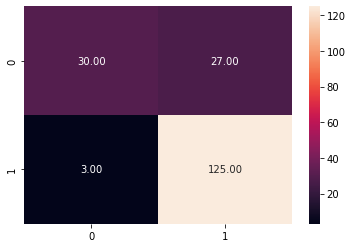

In [82]:
sns.heatmap(cm, annot=True,fmt=".2f");

In [83]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 24,  33],
       [  1, 127]], dtype=int64)

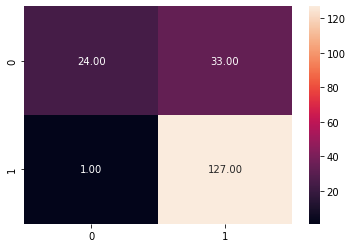

In [84]:
sns.heatmap(cm, annot=True,fmt='.2f');

In [85]:
y_pred = ext.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 24,  33],
       [  1, 127]], dtype=int64)

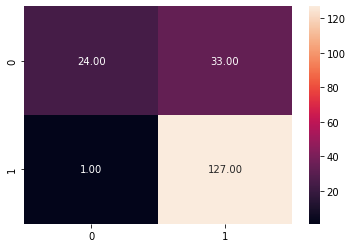

In [86]:
sns.heatmap(cm, annot=True,fmt='.2f');

In [87]:
y_pred = xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 25,  32],
       [  1, 127]], dtype=int64)

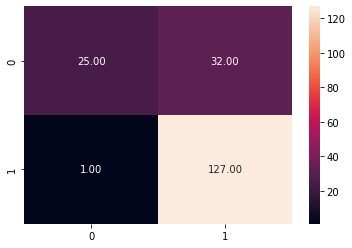

In [88]:
sns.heatmap(cm, annot=True,fmt='.2f');

In [89]:
lr = LogisticRegression()
lr.fit(X_test,y_test)
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 24,  33],
       [  1, 127]], dtype=int64)

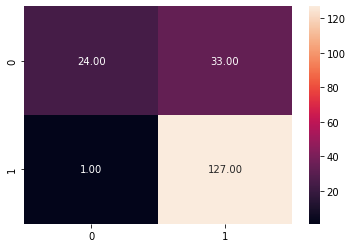

In [90]:
sns.heatmap(cm, annot=True,fmt='.2f');

In [91]:
y_pred = cb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 57,   0],
       [  0, 128]], dtype=int64)

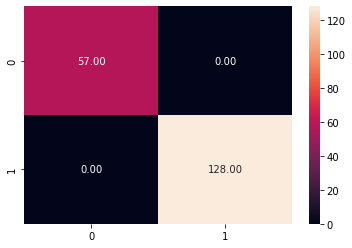

In [92]:
sns.heatmap(cm, annot=True,fmt='.2f');

###### We can obviously see that Catboost Classifier is best suited for this dataset